<a href="https://colab.research.google.com/github/alexgualberto/LinearRegression-Clustering/blob/main/LinearRegression%26Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Linear Regression e Clustering
## Autor: Alexandre dos Santos Gualberto

---

O objetivo deste projeto é utilizar técnicas de aprendizado de máquina para agrupar músicas com métricas semelhantes e criar um modelo preditivo de popularidade.

# **Conjunto de Dados**

## Spotify Tracks Genre
[Link para o Conjunto de Dados](https://www.kaggle.com/datasets/thedevastator/spotify-tracks-genre-dataset)

## **Descrição das Colunas**

### **1. track_id**
   - Identificador da música. (String)

### **2. artists**
   - O(s) nome(s) do(s) artista(s) associado(s) à faixa. (String)

### **3. album_name**
   - O nome do álbum ao qual a faixa pertence. (String)

### **4. track_name**
   - O nome da faixa. (String)

### **5. popularity**
   - A pontuação de popularidade da faixa no Spotify, variando de 0 a 100. (Integer)

### **6. duration_ms**
   - A duração da faixa em milissegundos. (Integer)

### **7. explicit**
   - Um valor booleano indicando se a faixa contém conteúdo explícito. (Boolean)

### **8. danceability**
   - Uma pontuação variando de 0 a 1 que representa a adequação de uma faixa para dançar, com base em vários elementos musicais. (Float)

### **9. energy**
   - Uma medida da intensidade e atividade de uma faixa, variando de 0 a 1. (Float)

### **10. key**
   - A tonalidade da faixa representada por um valor inteiro. (Integer)

### **11. loudness**
   - O volume da faixa em decibéis (dB). (Float)

### **12. mode**
   - O modo tonal da faixa, representado por um valor inteiro (0 para menor, 1 para maior). (Integer)

### **13. speechiness**
   - Uma pontuação variando de 0 a 1 que representa a presença de palavras faladas em uma faixa. (Float)

### **14. acousticness**
   - Uma pontuação variando de 0 a 1 que representa o quanto uma faixa possui uma qualidade acústica. (Float)

### **15. instrumentalness**
   - Uma pontuação variando de 0 a 1 que representa a probabilidade de uma faixa ser instrumental. (Float)

### **16. liveness**
   - Uma pontuação variando de 0 a 1 que representa a presença de uma audiência durante a gravação ou apresentação de uma faixa. (Float)

### **17. valence**
   - Uma pontuação variando de 0 a 1 que representa a positividade musical transmitida por uma faixa. (Float)

### **18. tempo**
   - O tempo da faixa em batidas por minuto (BPM). (Float)

### **19. time_signature**
   - O número de batidas dentro de cada compasso da faixa. (Integer)

### **20. track_genre**
   - O gênero da faixa. (String)


<a name="Exploração-Inicial"></a>
##**Exploração Inicial dos Conjuntos de Dados**

In [4]:
import pandas as pd
from google.colab import drive
import warnings

warnings.filterwarnings("ignore")

drive.mount('/content/drive')

dados = pd.read_csv('/content/drive/MyDrive/Projeto_Pandas/train.csv')
dados.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
# Retirada da coluna index duplicada
dados = dados.drop('Unnamed: 0', axis=1)

In [6]:
dados.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [7]:
dados.shape

(114000, 20)

In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [9]:
dados.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [10]:
dados[dados.isnull().any(axis=1)]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [11]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,114000.0,33.238535,22.305078,0.000,17.00000,35.000000,50.0000,100.000
duration_ms,114000.0,228029.153114,107297.712645,0.000,174066.00000,212906.000000,261506.0000,5237295.000
danceability,114000.0,0.566800,0.173542,0.000,0.45600,0.580000,0.6950,0.985
energy,114000.0,0.641383,0.251529,0.000,0.47200,0.685000,0.8540,1.000
key,114000.0,5.309140,3.559987,0.000,2.00000,5.000000,8.0000,11.000
loudness,114000.0,-8.258960,5.029337,-49.531,-10.01300,-7.004000,-5.0030,4.532
mode,114000.0,0.637553,0.480709,0.000,0.00000,1.000000,1.0000,1.000
speechiness,114000.0,0.084652,0.105732,0.000,0.03590,0.048900,0.0845,0.965
acousticness,114000.0,0.314910,0.332523,0.000,0.01690,0.169000,0.5980,0.996
instrumentalness,114000.0,0.156050,0.309555,0.000,0.00000,0.000042,0.0490,1.000


Perceba que a faixa possui valores nulos para identificação da musica e artista, o que não seria problema uma vez que estamos focando nas métricas da música, porém a faixa também apresenta valores impróprios para duração, uma música que dura 0ms não faz sentido. Portanto, será retirada do dataset.

In [12]:
dados = dados.drop(65900)

In [13]:
dados['track_genre'].nunique()


114

In [14]:
for coluna in dados.columns:
    if dados[coluna].dtype in ['int64', 'float64']:
        # Apenas para colunas numéricas
        Q1 = dados[coluna].quantile(0.25)
        Q3 = dados[coluna].quantile(0.75)
        IQR = Q3 - Q1

        Limite_Inferior = Q1 - 1.5 * IQR
        Limite_Superior = Q3 + 1.5 * IQR

        outliers = dados[(dados[coluna] < Limite_Inferior) | (dados[coluna] > Limite_Superior)]
        print(f"Outliers em {coluna}: {outliers[coluna].tolist()}")

Outliers em popularity: [100, 100]
Outliers em duration_ms: [447306, 406103, 445533, 578064, 403911, 426306, 527506, 527506, 400362, 406573, 527506, 527506, 527506, 429973, 417600, 397573, 434600, 479053, 655440, 436840, 37702, 591693, 416040, 505973, 428853, 470837, 407295, 431640, 427160, 444159, 478197, 523453, 432963, 394840, 745653, 479204, 432213, 560280, 416133, 417186, 468693, 395720, 36006, 457539, 579760, 400000, 463920, 436236, 423668, 433426, 625066, 421645, 452666, 412300, 444159, 402386, 828586, 439280, 494532, 31824, 480146, 445727, 540346, 499733, 460120, 683893, 568506, 773800, 576133, 482786, 398280, 448914, 563866, 463991, 430986, 793200, 507053, 416133, 502693, 745386, 560280, 413480, 405653, 445000, 436413, 536000, 503240, 465933, 395093, 601240, 470215, 418442, 722200, 403533, 445000, 436413, 393480, 536000, 503240, 465933, 395093, 480706, 480106, 442400, 456480, 402240, 490327, 645210, 464453, 635790, 442400, 470880, 393958, 464293, 486840, 431874, 416333, 395294

In [15]:
dados['explicit'] = dados['explicit'].astype(int)

In [16]:
print(len(outliers['liveness']))

12157


In [17]:
print(dados.columns)


Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')


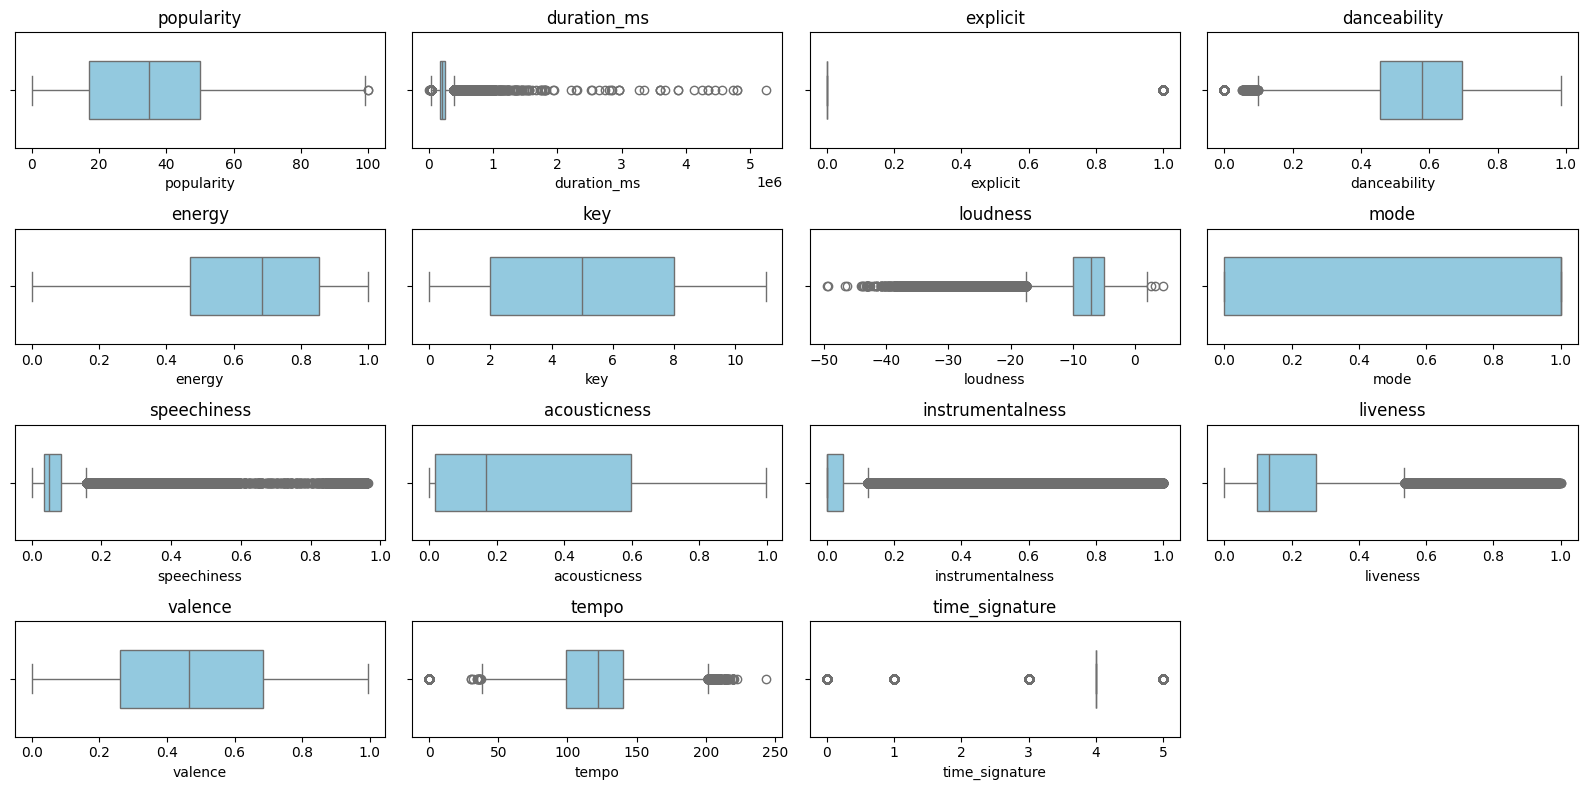

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

colunas_boxplot = []

for coluna in dados.columns:
  if dados[coluna].dtype in ['int64', 'float64']:
    colunas_boxplot.append(coluna)

plt.figure(figsize=(16, 8))

for i, coluna in enumerate(colunas_boxplot, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=dados[coluna], color='skyblue', width=0.5)
    plt.title(coluna)

plt.tight_layout()
plt.show()

Loudness Units Full Scale, pesquisar mais sobre e detalhar esse atributo "loudness"

Ao analisar os Dados realizei as seguintes transformações:
- Normalização dos atributos "tempo" e "loudness", uma vez que não estavam em uma escala padronizada podendo dificultar a visualização de algumas relações.
- Criei a coluna "duration_bins" que discrimina a duração das músicas em faixas de valores, no total são 7 faixas.
  - faixa "0" musicas com duração < 1 minuto.
  - faixa "1" musicas com duração >= 1 minuto e < 2 minutos.
  - faixa "2" musicas com duração >= 2 minutos e < 3 minutos.
  - faixa "3" musicas com duração >= 3 minutos e < 4 minutos.
  - faixa "4" musicas com duração >= 4 minutos e < 5 minutos.
  - faixa "5" musicas com duração >= 5 minutos e < 6 minutos.
  - faixa "6" musicas com duração >= 6 minutos.


In [19]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

colunas_para_padronizar = ['loudness', 'tempo']

scaler = MinMaxScaler()

dados[colunas_para_padronizar] = scaler.fit_transform(dados[colunas_para_padronizar])


In [20]:
# Define os limites para os bins em milissegundos
limites_bins = [0, 60000, 120000, 180000, 240000, 300000, 360000, float('inf')]

# Define os rótulos para cada bin
rotulos_bins = [0, 1, 2, 3, 4, 5, 6]

# Cria a nova coluna 'duration_bin' usando pd.cut
dados['duration_bin'] = pd.cut(dados['duration_ms'], bins=limites_bins, labels=rotulos_bins, include_lowest=True)

dados.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_bin
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.715,0.361245,4,acoustic,3
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.267,0.318397,4,acoustic,2
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.120,0.313643,4,acoustic,3
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.143,0.746758,3,acoustic,3
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.167,0.492863,4,acoustic,3


In [21]:
dados = dados.drop_duplicates()

# Análise Exploratória

## Análise dos dados em geral

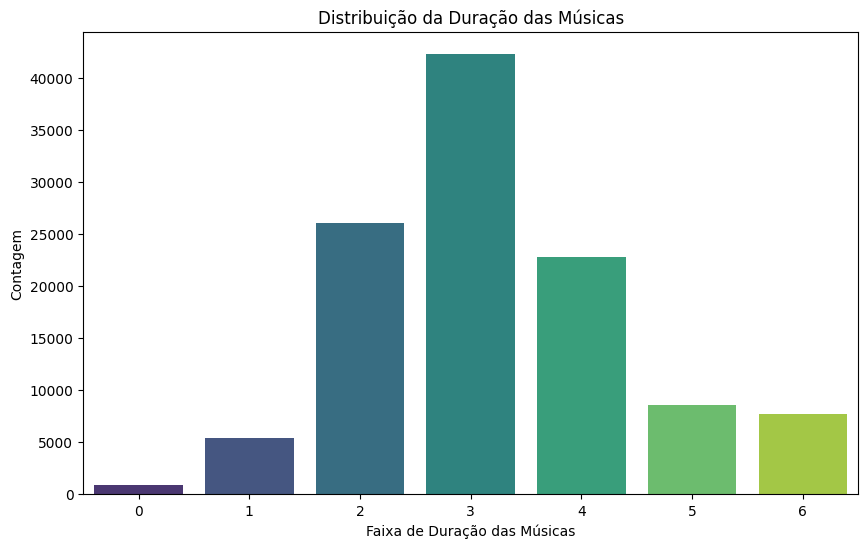

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.countplot(x='duration_bin', data=dados, palette='viridis')
plt.xlabel('Faixa de Duração das Músicas')
plt.ylabel('Contagem')
plt.title('Distribuição da Duração das Músicas')

plt.show()

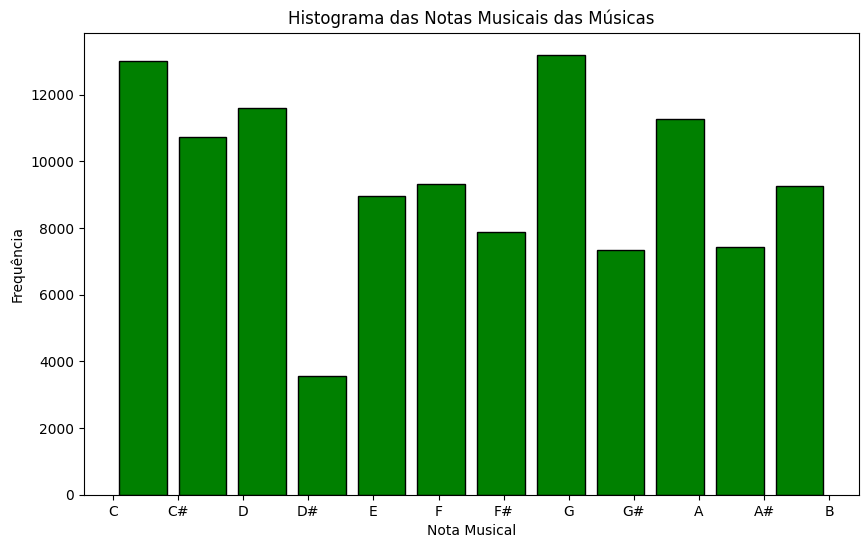

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(dados['key'], bins=12, color='green', edgecolor='black', align='mid', rwidth=0.8)

plt.xlabel('Nota Musical')
plt.ylabel('Frequência')
plt.title('Histograma das Notas Musicais das Músicas')

# Definir rótulos específicos para cada chave musical
plt.xticks(range(12), ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])

plt.show()


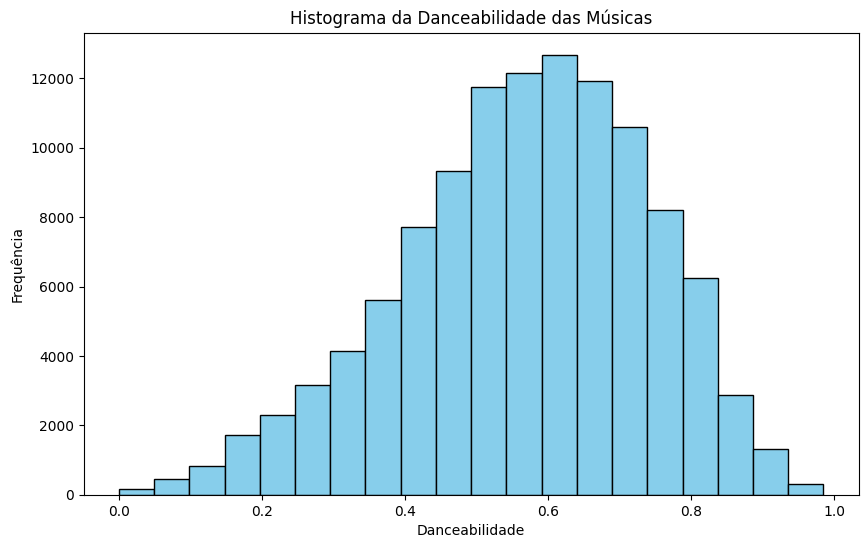

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(dados['danceability'], bins=20, color='skyblue', edgecolor='black')

plt.xlabel('Danceabilidade')
plt.ylabel('Frequência')
plt.title('Histograma da Danceabilidade das Músicas')

plt.show()


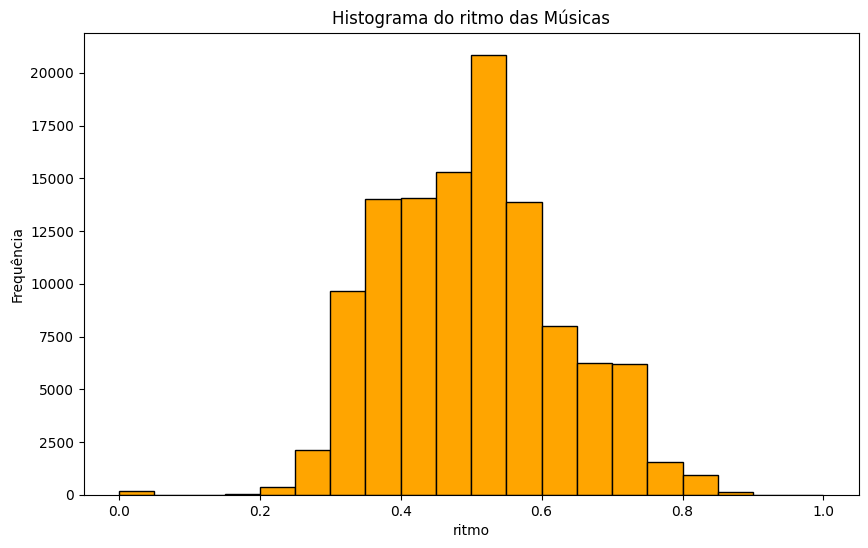

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(dados['tempo'], bins=20, color='orange', edgecolor='black')

plt.xlabel('ritmo')
plt.ylabel('Frequência')
plt.title('Histograma do ritmo das Músicas')

plt.show()

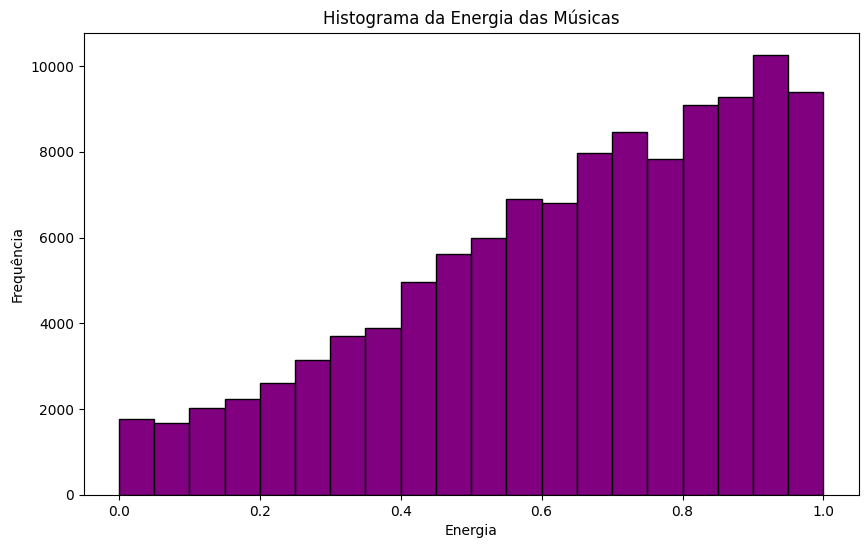

In [26]:
plt.figure(figsize=(10, 6))
plt.hist(dados['energy'], bins=20, color='purple', edgecolor='black')

plt.xlabel('Energia')
plt.ylabel('Frequência')
plt.title('Histograma da Energia das Músicas')

plt.show()

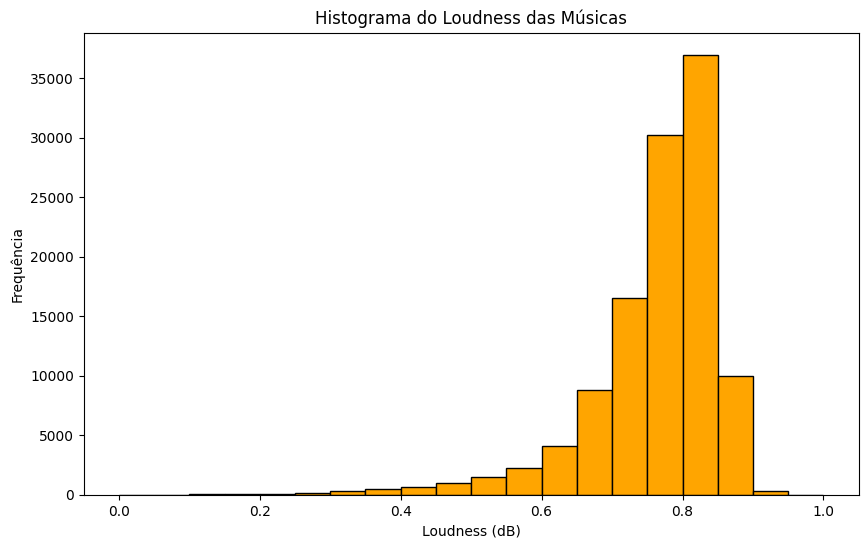

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(dados['loudness'], bins=20, color='orange', edgecolor='black')

plt.xlabel('Loudness (dB)')
plt.ylabel('Frequência')
plt.title('Histograma do Loudness das Músicas')

plt.show()

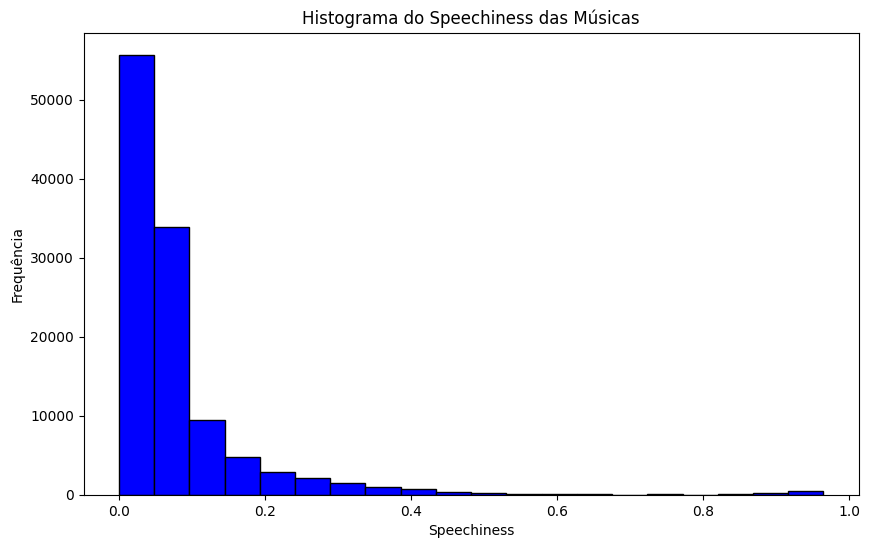

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(dados['speechiness'], bins=20, color='blue', edgecolor='black')

plt.xlabel('Speechiness')
plt.ylabel('Frequência')
plt.title('Histograma do Speechiness das Músicas')

plt.show()


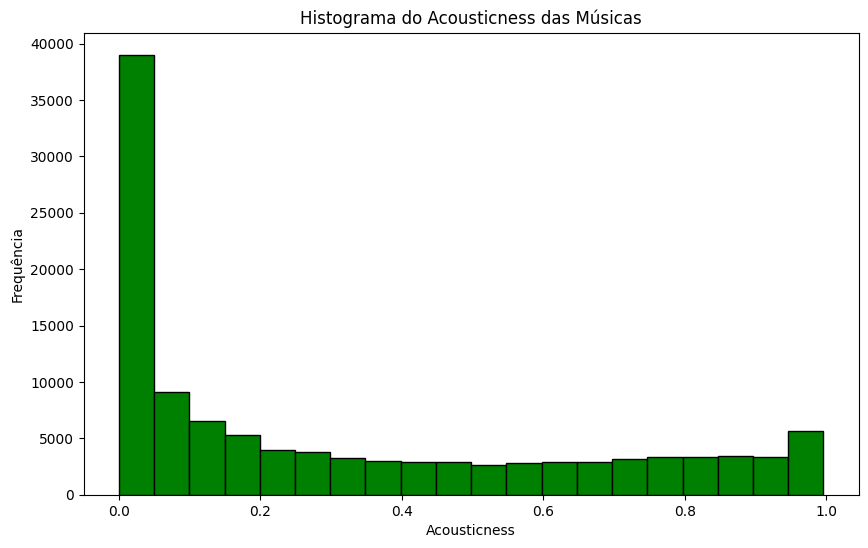

In [29]:
plt.figure(figsize=(10, 6))
plt.hist(dados['acousticness'], bins=20, color='green', edgecolor='black')

plt.xlabel('Acousticness')
plt.ylabel('Frequência')
plt.title('Histograma do Acousticness das Músicas')

plt.show()


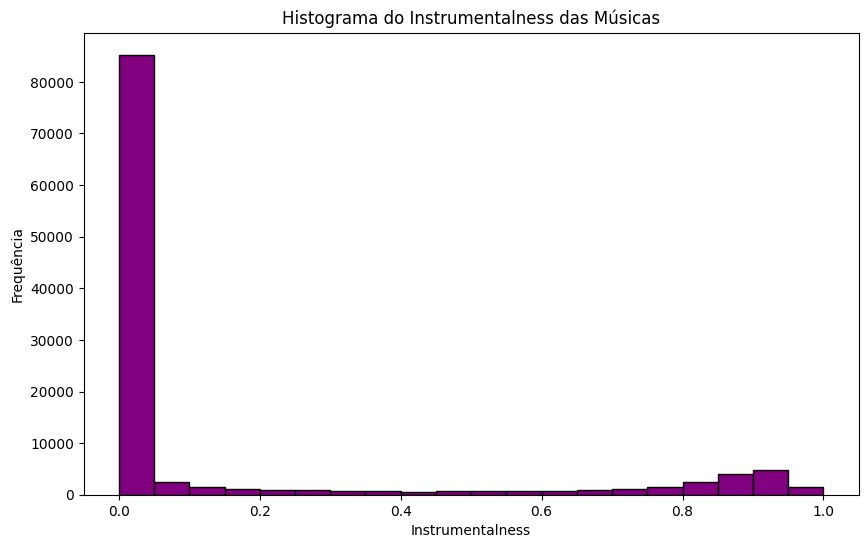

In [30]:
plt.figure(figsize=(10, 6))
plt.hist(dados['instrumentalness'], bins=20, color='purple', edgecolor='black')

plt.xlabel('Instrumentalness')
plt.ylabel('Frequência')
plt.title('Histograma do Instrumentalness das Músicas')

plt.show()


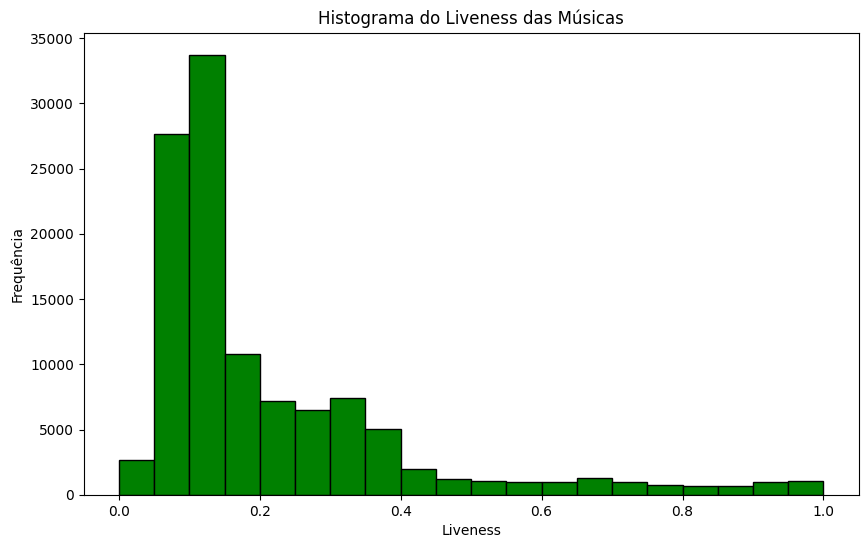

In [31]:
plt.figure(figsize=(10, 6))
plt.hist(dados['liveness'], bins=20, color='green', edgecolor='black')

plt.xlabel('Liveness')
plt.ylabel('Frequência')
plt.title('Histograma do Liveness das Músicas')

plt.show()


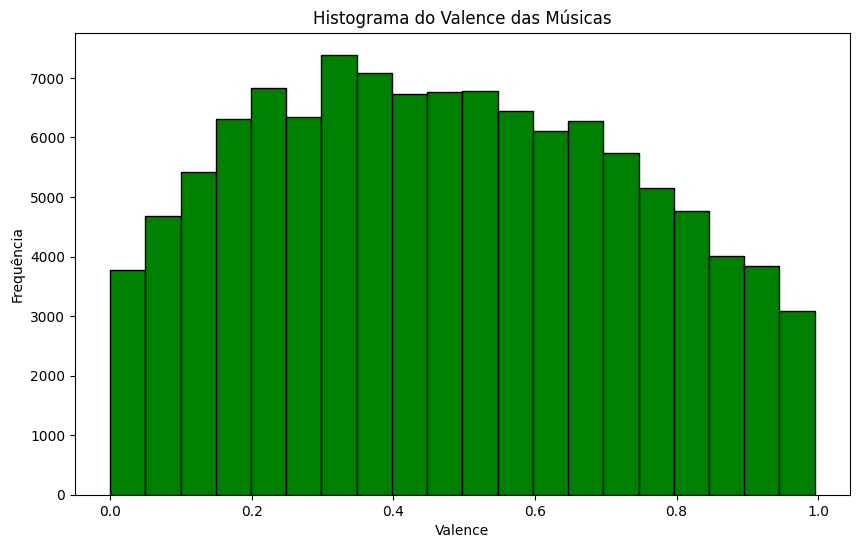

In [32]:
plt.figure(figsize=(10, 6))
plt.hist(dados['valence'], bins=20, color='green', edgecolor='black')

plt.xlabel('Valence')
plt.ylabel('Frequência')
plt.title('Histograma do Valence das Músicas')

plt.show()

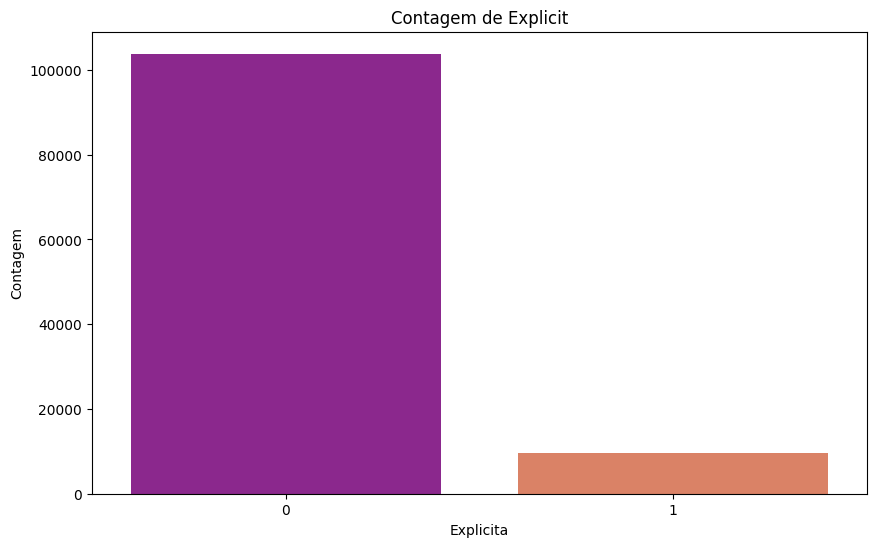

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(x='explicit', data=dados, palette='plasma')

plt.xlabel('Explicita')
plt.ylabel('Contagem')
plt.title('Contagem de Explicit')

plt.show()

## Análise das músicas mais populares

O objetivo é identificar um perfil de características que as músicas mais populares compartilham.
- Será considerada uma musica popular as músicas no quarto quartil do atributo "popularity".
- Ou seja, estaremos analisando os 25% de músicas mais populares do conjunto de dados.

In [34]:
musicas_populares = dados[dados['popularity'] > 50]
musicas_populares.shape[0]

27749

No conjunto de dados temos 27770 músicas que foram consideradas populares. As análises desta seção serão focadas nesses dados.

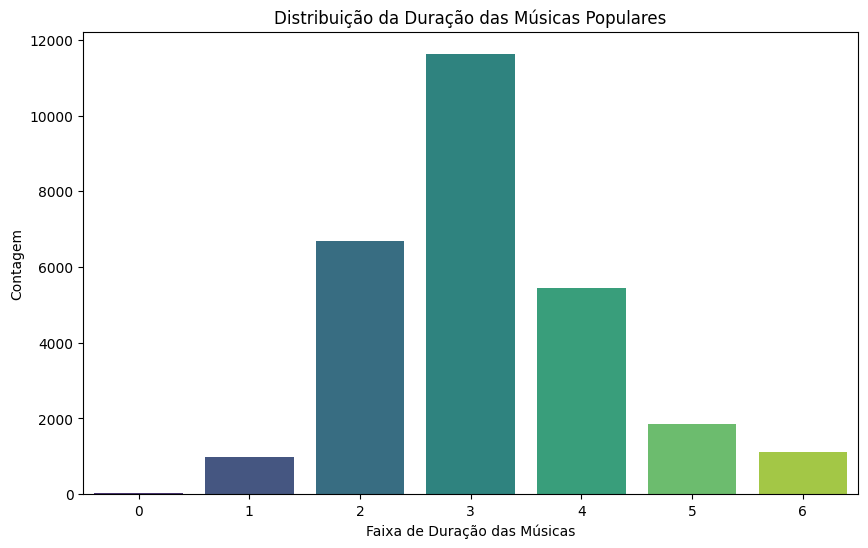

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(x='duration_bin', data=musicas_populares, palette='viridis')

plt.xlabel('Faixa de Duração das Músicas')
plt.ylabel('Contagem')
plt.title('Distribuição da Duração das Músicas Populares')

plt.show()


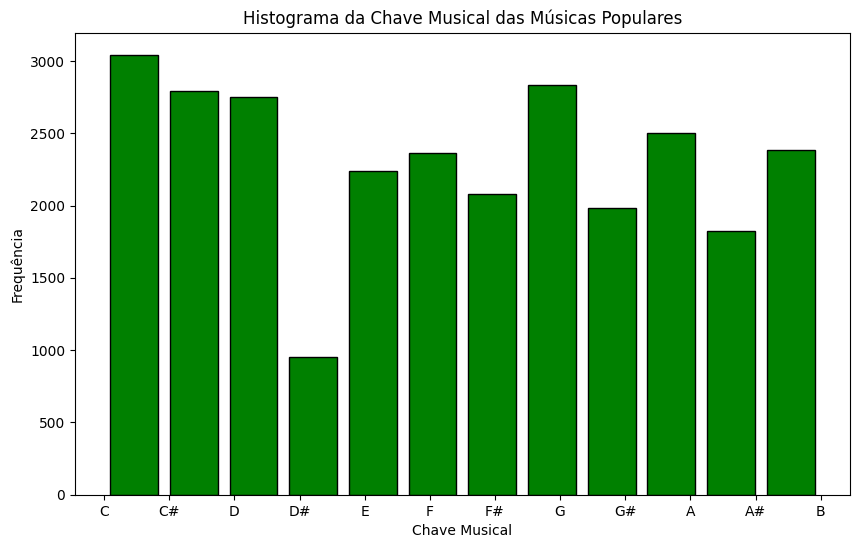

In [36]:
plt.figure(figsize=(10, 6))
plt.hist(musicas_populares['key'], bins=12, color='green', edgecolor='black', align='mid', rwidth=0.8)

plt.xlabel('Chave Musical')
plt.ylabel('Frequência')
plt.title('Histograma da Chave Musical das Músicas Populares')

plt.xticks(range(12), ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])

plt.show()


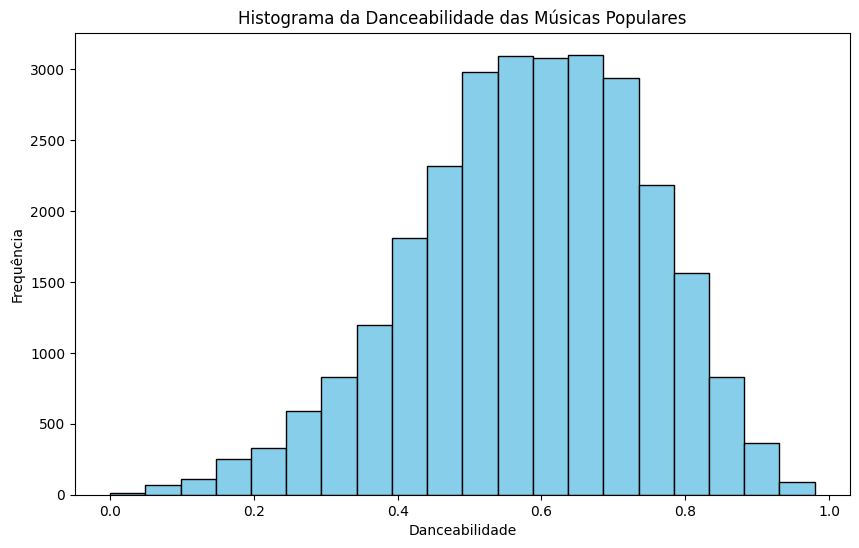

In [37]:
plt.figure(figsize=(10, 6))
plt.hist(musicas_populares['danceability'], bins=20, color='skyblue', edgecolor='black')

plt.xlabel('Danceabilidade')
plt.ylabel('Frequência')
plt.title('Histograma da Danceabilidade das Músicas Populares')

plt.show()

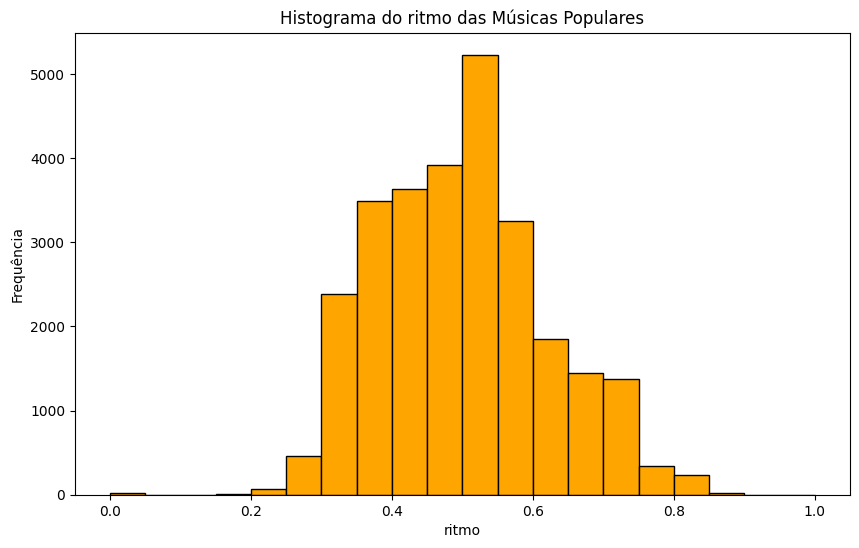

In [38]:
plt.figure(figsize=(10, 6))
plt.hist(musicas_populares['tempo'], bins=20, color='orange', edgecolor='black')

plt.xlabel('ritmo')
plt.ylabel('Frequência')
plt.title('Histograma do ritmo das Músicas Populares')

plt.show()

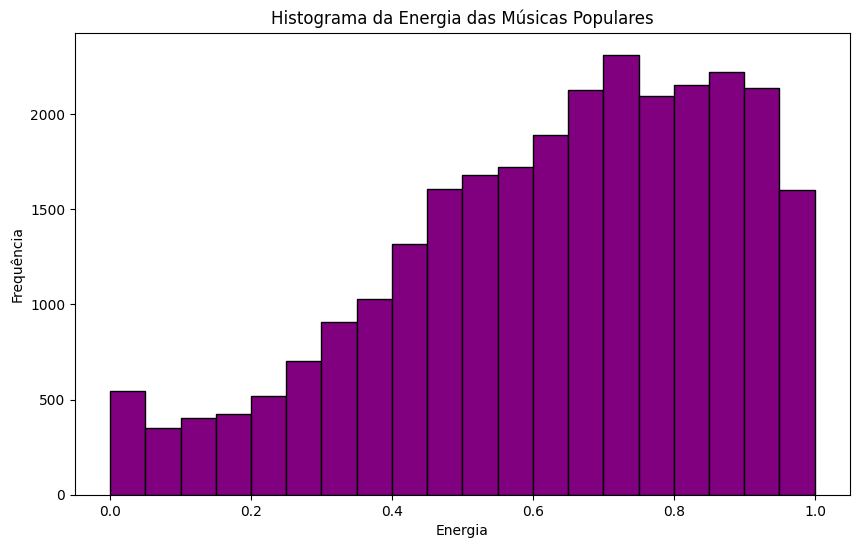

In [39]:
plt.figure(figsize=(10, 6))
plt.hist(musicas_populares['energy'], bins=20, color='purple', edgecolor='black')

plt.xlabel('Energia')
plt.ylabel('Frequência')
plt.title('Histograma da Energia das Músicas Populares')

plt.show()

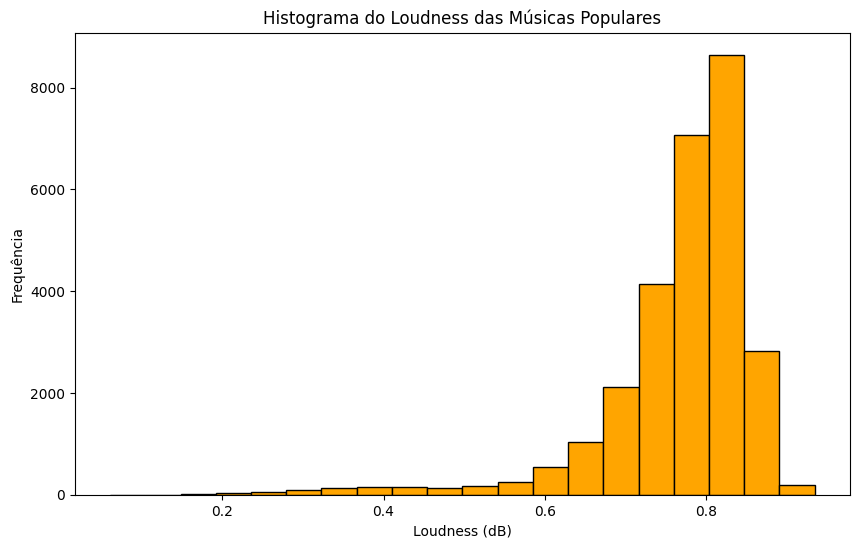

In [40]:
plt.figure(figsize=(10, 6))
plt.hist(musicas_populares['loudness'], bins=20, color='orange', edgecolor='black')

plt.xlabel('Loudness (dB)')
plt.ylabel('Frequência')
plt.title('Histograma do Loudness das Músicas Populares')

plt.show()

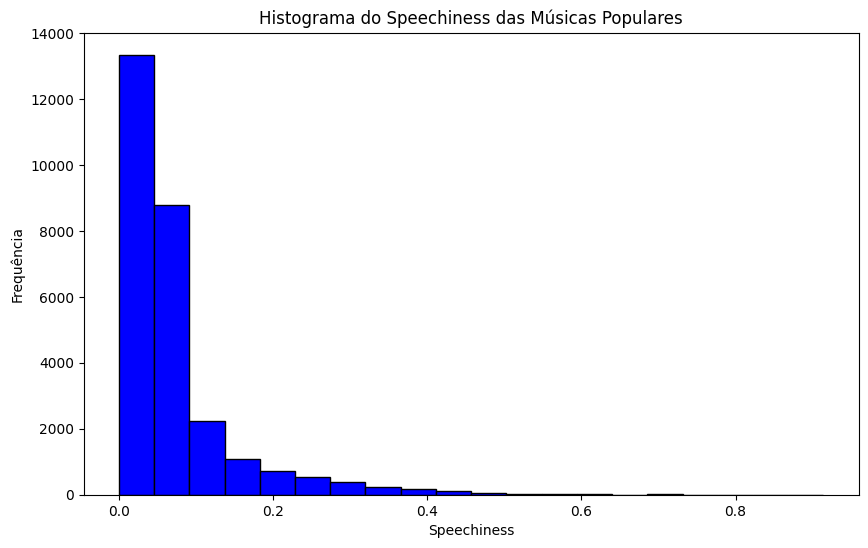

In [41]:
plt.figure(figsize=(10, 6))
plt.hist(musicas_populares['speechiness'], bins=20, color='blue', edgecolor='black')

plt.xlabel('Speechiness')
plt.ylabel('Frequência')
plt.title('Histograma do Speechiness das Músicas Populares')

plt.show()


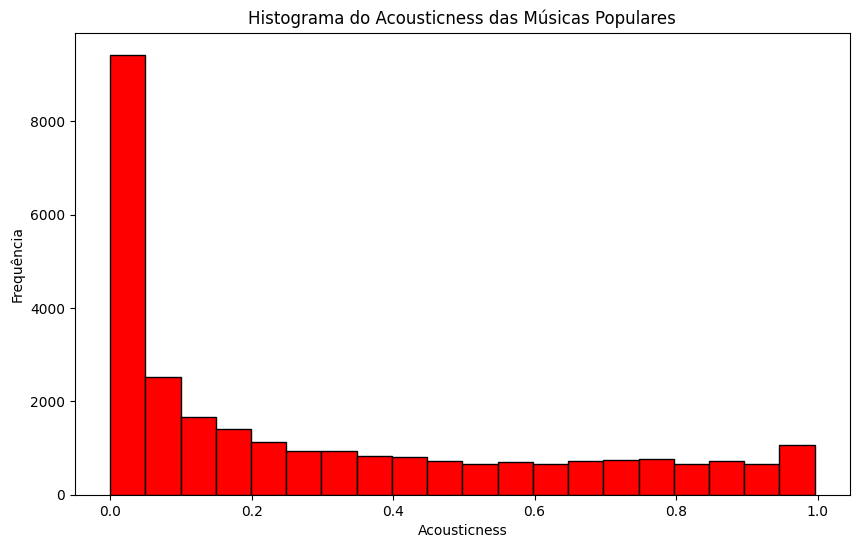

In [42]:
plt.figure(figsize=(10, 6))
plt.hist(musicas_populares['acousticness'], bins=20, color='red', edgecolor='black')

plt.xlabel('Acousticness')
plt.ylabel('Frequência')
plt.title('Histograma do Acousticness das Músicas Populares')

plt.show()


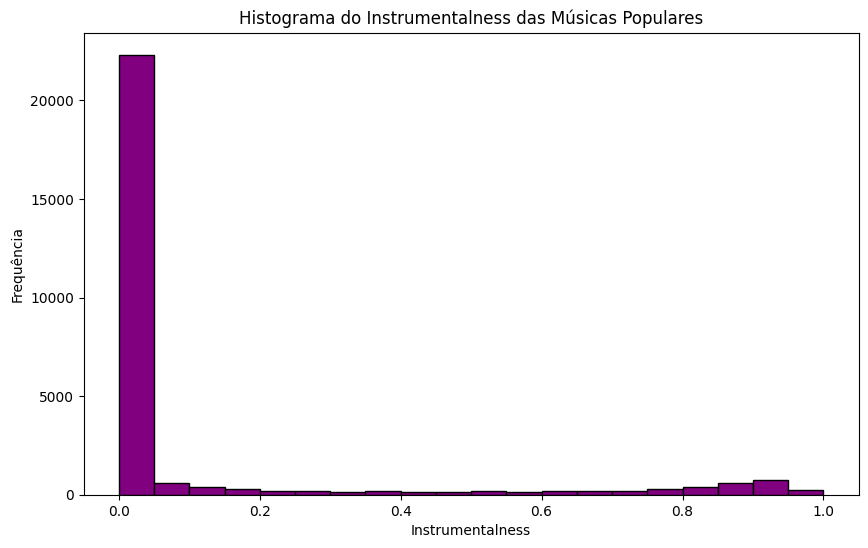

In [43]:
plt.figure(figsize=(10, 6))
plt.hist(musicas_populares['instrumentalness'], bins=20, color='purple', edgecolor='black')

plt.xlabel('Instrumentalness')
plt.ylabel('Frequência')
plt.title('Histograma do Instrumentalness das Músicas Populares')

plt.show()


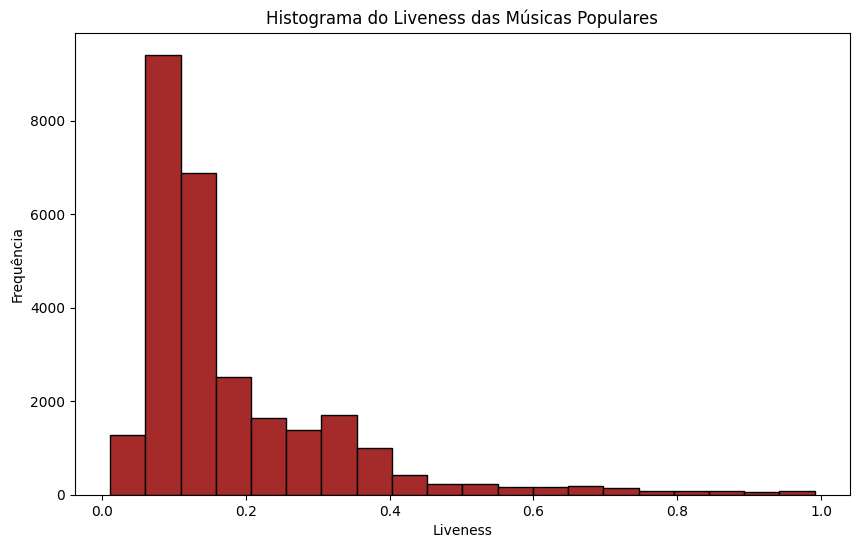

In [44]:
plt.figure(figsize=(10, 6))
plt.hist(musicas_populares['liveness'], bins=20, color='brown', edgecolor='black')

plt.xlabel('Liveness')
plt.ylabel('Frequência')
plt.title('Histograma do Liveness das Músicas Populares')

plt.show()

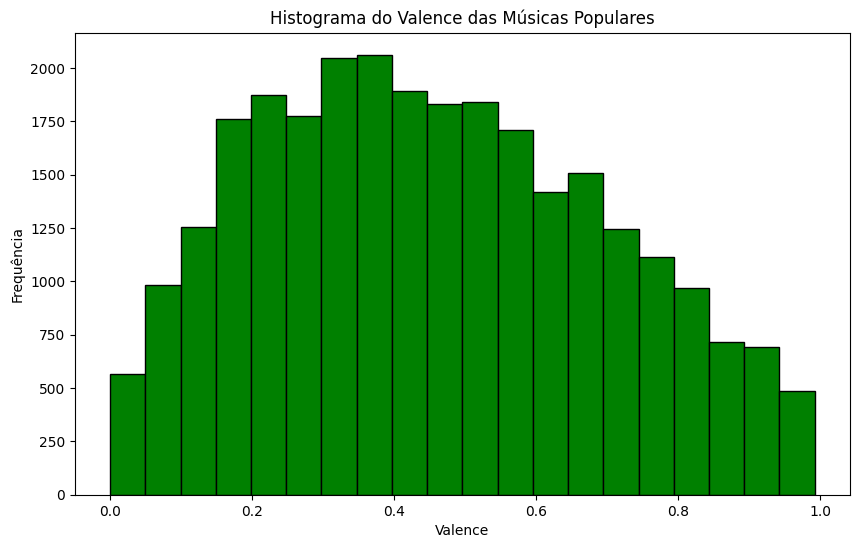

In [45]:
plt.figure(figsize=(10, 6))
plt.hist(musicas_populares['valence'], bins=20, color='green', edgecolor='black')

plt.xlabel('Valence')
plt.ylabel('Frequência')
plt.title('Histograma do Valence das Músicas Populares')

plt.show()

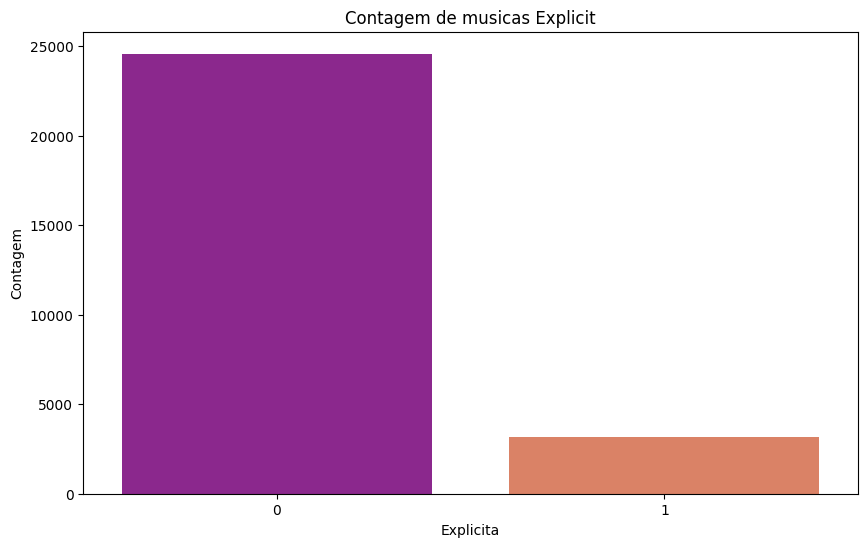

In [46]:
plt.figure(figsize=(10, 6))
sns.countplot(x='explicit', data=musicas_populares, palette='plasma')

plt.xlabel('Explicita')
plt.ylabel('Contagem')
plt.title('Contagem de musicas Explicit')

plt.show()

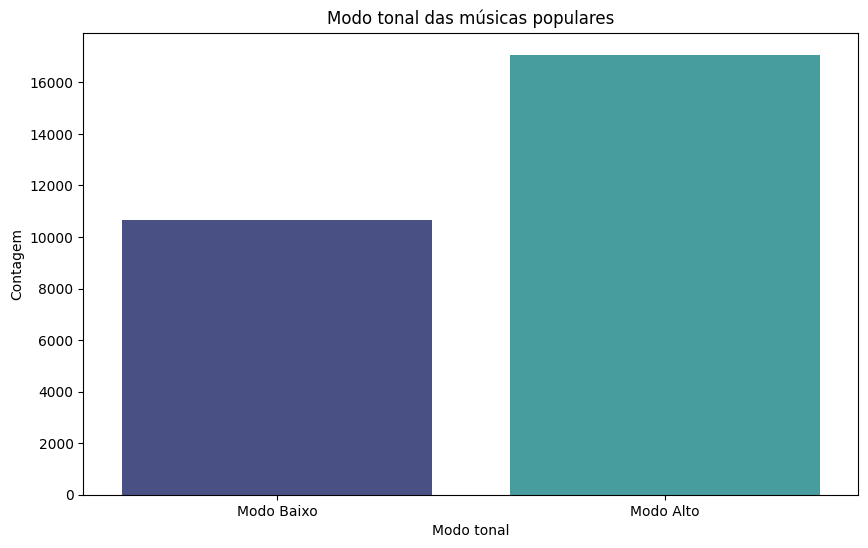

In [47]:
plt.figure(figsize=(10, 6))
g = sns.countplot(x='mode', data=musicas_populares, palette='mako')

plt.xlabel('Modo tonal')
plt.ylabel('Contagem')
plt.title('Modo tonal das músicas populares')

g.set(xticklabels=["Modo Baixo", "Modo Alto"])

plt.show()

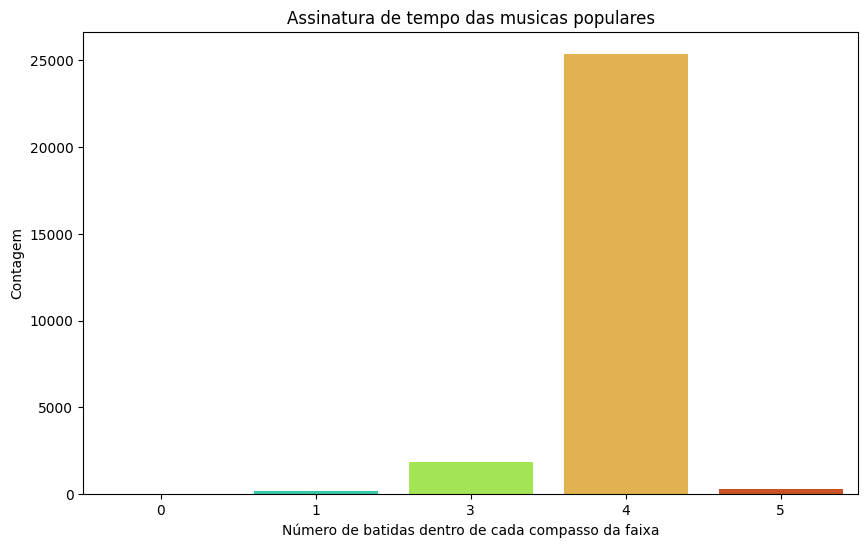

In [48]:
plt.figure(figsize=(10, 6))
sns.countplot(x='time_signature', data=musicas_populares, palette='turbo')

plt.xlabel('Número de batidas dentro de cada compasso da faixa')
plt.ylabel('Contagem')
plt.title('Assinatura de tempo das musicas populares')

plt.show()

## Diferença entre as músicas mais populares e o restante das músicas

In [49]:
import pandas as pd

# Lista das características musicais para calcular as médias
caracteristicas_musicais = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness',
                            'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

merged = dados.merge(musicas_populares, how='outer', indicator=True)

# Filtrar apenas as linhas presentes apenas em 'dados'
restante = merged[merged['_merge'] == 'left_only'].drop(columns=['_merge'])


medias_populares_restante = pd.DataFrame(index=caracteristicas_musicais, columns=['populares', 'restante'])

medias_populares_restante['populares'] = musicas_populares[caracteristicas_musicais].mean()

medias_populares_restante['restante'] = restante[caracteristicas_musicais].mean()

medias_populares_restante.loc['explicit', 'populares'] = musicas_populares['explicit'].value_counts(normalize=True).get(1, 0)

medias_populares_restante.loc['explicit', 'restante'] = restante['explicit'].value_counts(normalize=True).get(1, 0)

medias_populares_restante

,populares,restante
popularity,62.117770,24.012238
duration_ms,220287.472377,230602.033881
danceability,0.582738,0.561951
energy,0.631438,0.645536
loudness,0.769003,0.761977
speechiness,0.075459,0.087655
acousticness,0.294240,0.320475
instrumentalness,0.111442,0.170018
liveness,0.184432,0.223050
valence,0.455659,0.480203


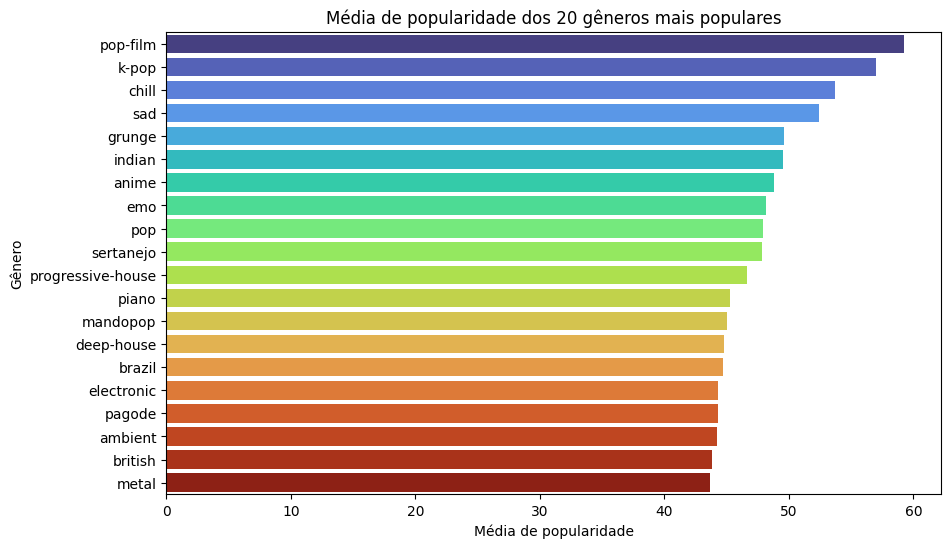

In [50]:
genero_grouped = dados.groupby('track_genre')['popularity'].mean().nlargest(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=genero_grouped.values, y=genero_grouped.index, palette='turbo')

plt.xlabel('Média de popularidade')
plt.ylabel('Gênero')
plt.title('Média de popularidade dos 20 gêneros mais populares')

plt.show()


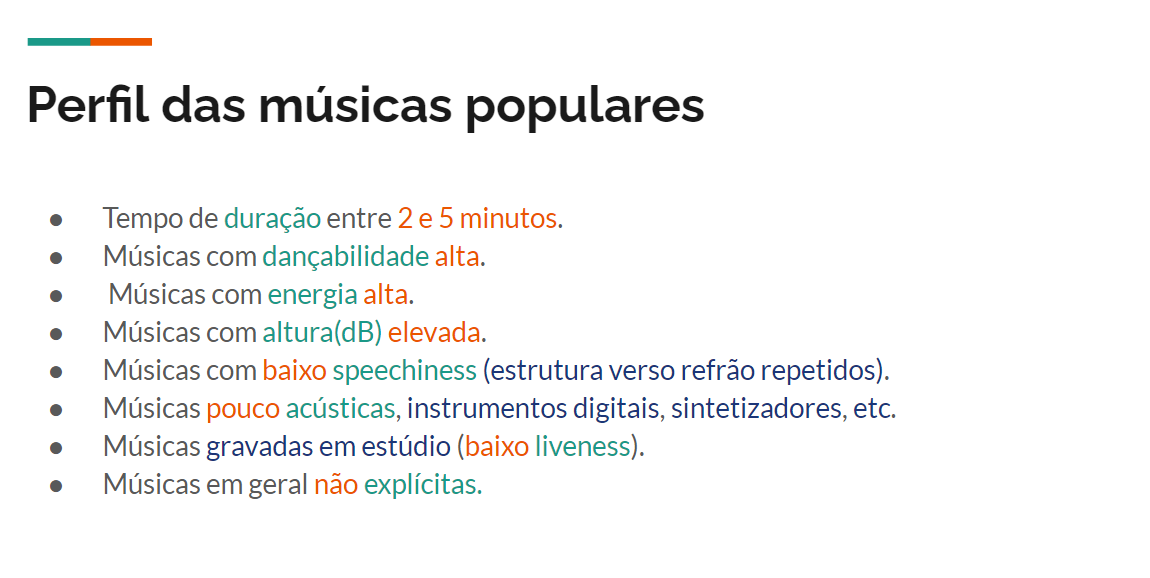![image.png]()

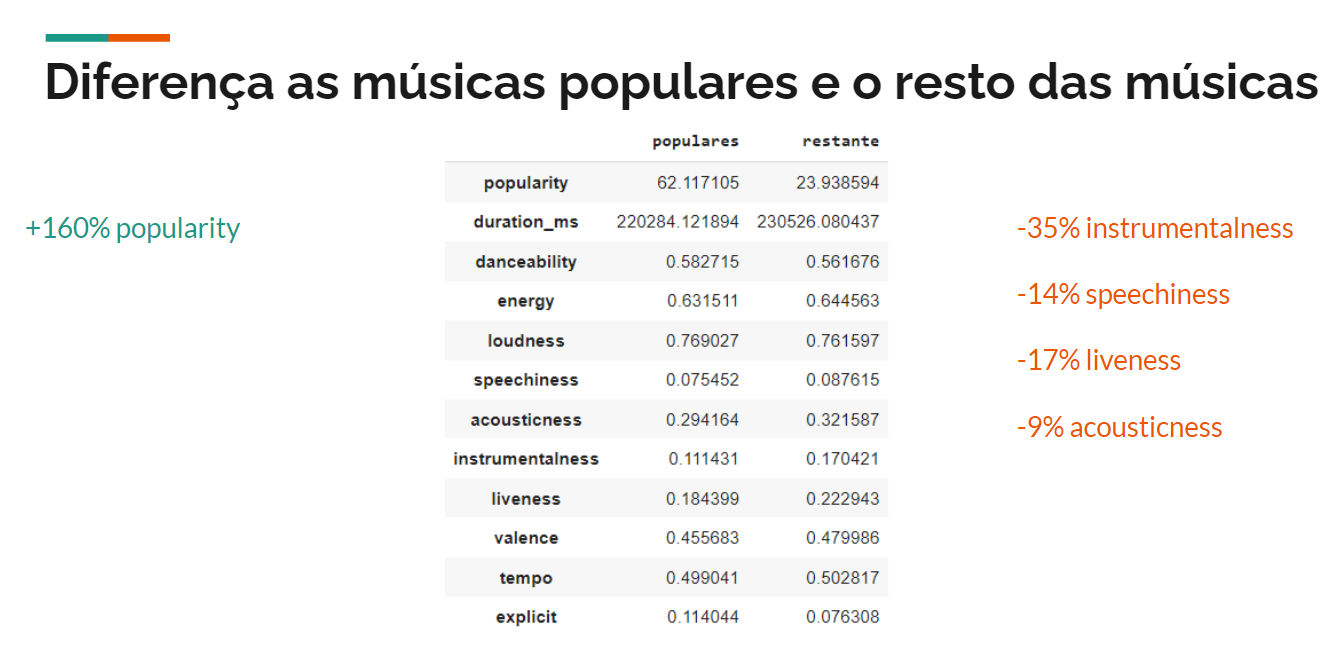

## Análise de correlação

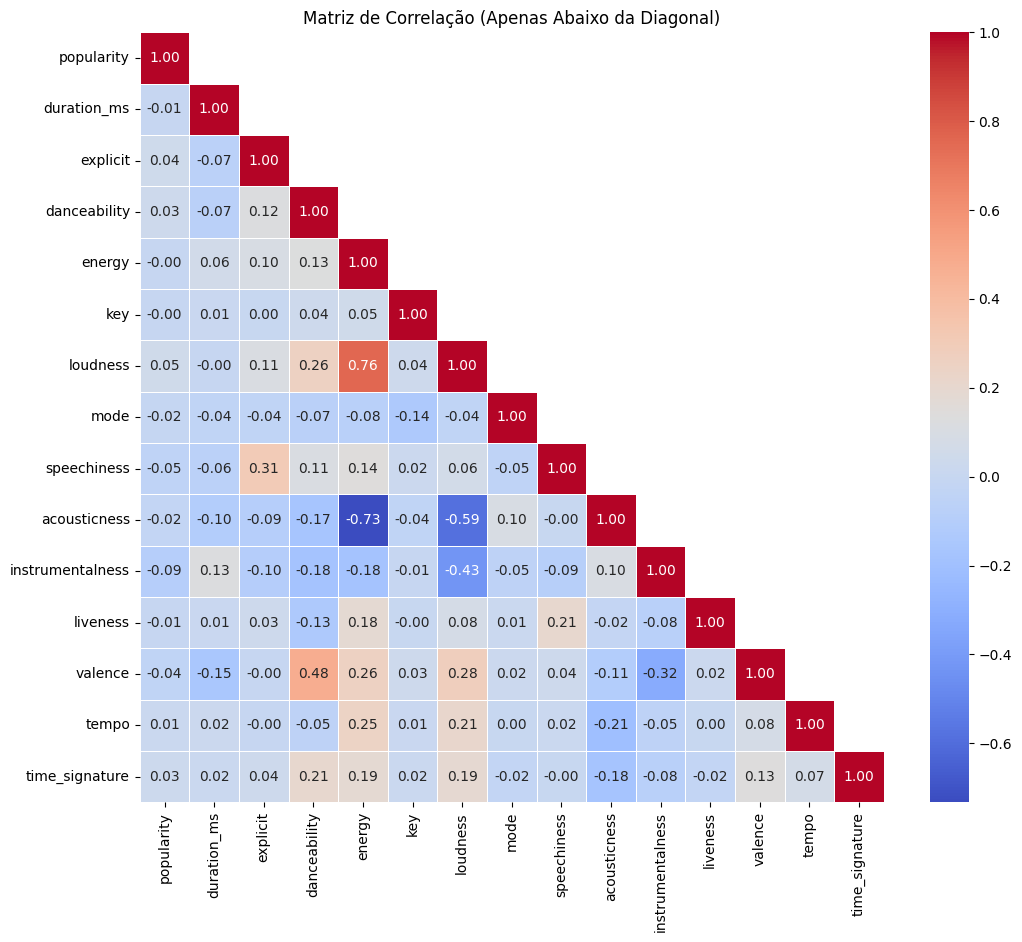

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

correlacao = dados.corr()

mascara = np.triu(np.ones_like(correlacao, dtype=bool), k=1)

plt.figure(figsize=(12, 10))
sns.heatmap(correlacao, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5, mask=mascara)

plt.title('Matriz de Correlação (Apenas Abaixo da Diagonal)')

plt.show()


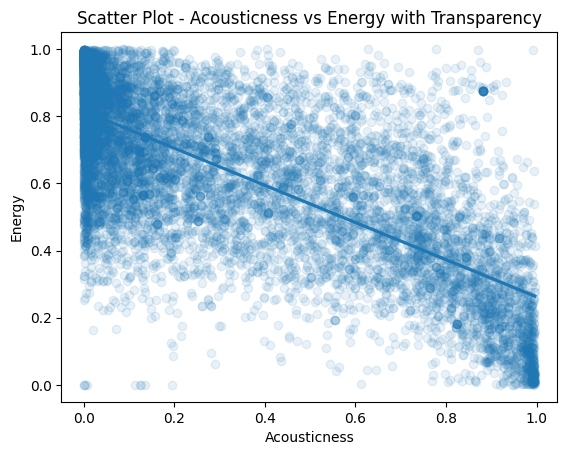

In [53]:
dados_amostrados = dados.sample(frac=0.1)

# Cria um scatter plot com transparência
sns.regplot(x='acousticness', y='energy', data=dados_amostrados, scatter_kws={'alpha':0.1})

plt.title('Scatter Plot - Acousticness vs Energy with Transparency')
plt.xlabel('Acousticness')
plt.ylabel('Energy')

plt.show()

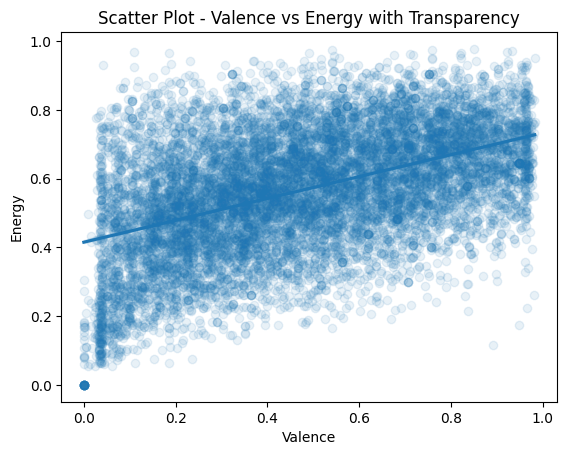

In [54]:
dados_amostrados = dados.sample(frac=0.1)

# Cria um scatter plot com transparência
sns.regplot(x='valence', y='danceability', data=dados_amostrados, scatter_kws={'alpha':0.1})

plt.title('Scatter Plot - Valence vs Energy with Transparency')
plt.xlabel('Valence')
plt.ylabel('Energy')

plt.show()

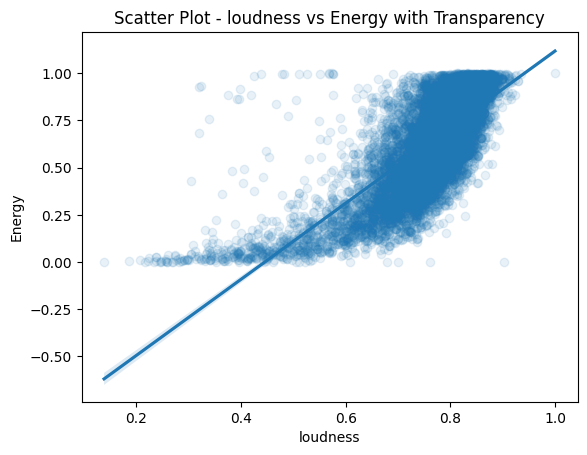

In [55]:
dados_amostrados = dados.sample(frac=0.1)

# Cria um scatter plot com transparência
sns.regplot(x='loudness', y='energy', data=dados_amostrados, scatter_kws={'alpha':0.1})

plt.title('Scatter Plot - loudness vs Energy with Transparency')
plt.xlabel('loudness')
plt.ylabel('Energy')

plt.show()

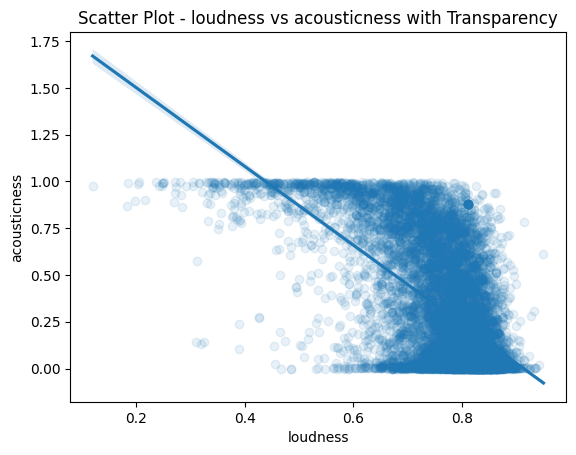

In [56]:
dados_amostrados = dados.sample(frac=0.1)

# Cria um scatter plot com transparência
sns.regplot(x='loudness', y='acousticness', data=dados_amostrados, scatter_kws={'alpha':0.1})

plt.title('Scatter Plot - loudness vs acousticness with Transparency')
plt.xlabel('loudness')
plt.ylabel('acousticness')

plt.show()

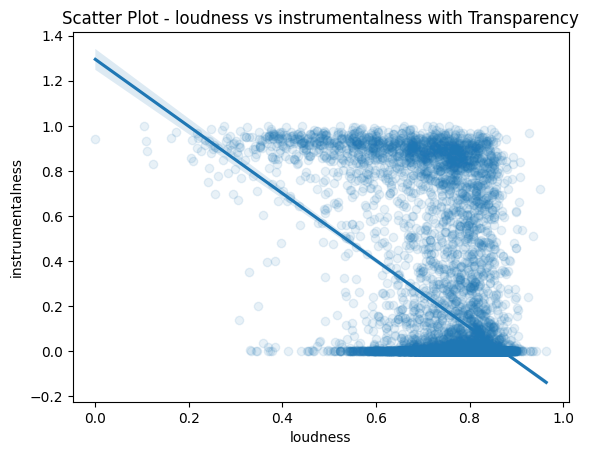

In [57]:
dados_amostrados = dados.sample(frac=0.1)

# Cria um scatter plot com transparência
sns.regplot(x='loudness', y='instrumentalness', data=dados_amostrados, scatter_kws={'alpha':0.1})

plt.title('Scatter Plot - loudness vs instrumentalness with Transparency')
plt.xlabel('loudness')
plt.ylabel('instrumentalness')

plt.show()

##Análise dos gêneros tipicamente brasileiros

In [58]:
# Criação do dataset com generos tipicamente brasileiras
generos_br = ['brazil', 'forro', 'mpb', 'pagode', 'samba', 'sertanejo']

dados_br = dados[dados['track_genre'].isin(generos_br)]

dados_br

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_bin
9000,6GomT970rCOkKAyyrwJeZi,Öwnboss;Sevek,Move Your Body,Move Your Body,82,157444,0,0.848,0.821,2,...,0,0.0527,0.01690,0.000403,0.0962,0.249,0.513827,4,brazil,2
9001,7DFIPUWRKwOB8RWky8ELq8,BK;JXNV$,Castelos & Ruínas,"Amores, Vícios e Obsessões",56,194478,0,0.833,0.517,11,...,0,0.3010,0.11600,0.000142,0.1160,0.187,0.530246,4,brazil,3
9002,1JAqy8JxzsmMRq5jD2Oi49,Liu;GenX,Pirate,Pirate,54,221775,0,0.720,0.781,10,...,0,0.0609,0.00408,0.807000,0.3080,0.307,0.513638,4,brazil,3
9003,2p9CY7YZIrkZLg4ztUCjZN,Yago Oproprio,Helipa,Helipa,57,202213,0,0.692,0.427,11,...,0,0.3910,0.52700,0.000000,0.1700,0.542,0.308524,4,brazil,3
9004,1XqWGzOdE6Q6FgFwAg0t9R,Xamã;Bagua Records;Luccas Carlos,O Iluminado,Uma Linda Mulher,54,208000,1,0.704,0.616,6,...,0,0.0818,0.29900,0.000000,0.0856,0.161,0.369697,4,brazil,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97995,6L7edR8ePoAiOEthSAfeBD,Gerson Rufino,Reconstrução,Reconstrução,46,262143,0,0.769,0.718,0,...,1,0.0241,0.23400,0.000000,0.1680,0.725,0.431500,4,sertanejo,4
97996,0t9X7I69027UILQB4WYCai,Chico Rey & Paraná,"Sucessos de Ouro, Vol. 15",Velha Porteira,43,224600,0,0.529,0.564,4,...,1,0.0247,0.66800,0.000000,0.1960,0.594,0.659258,3,sertanejo,3
97997,6nYIAevQfh7QhuQYXYLy50,Léo & Raphael,Na Contramão do Sucesso,Aqui É Parana Cunhado,44,153426,0,0.690,0.926,1,...,0,0.1830,0.33600,0.000000,0.0319,0.867,0.731880,4,sertanejo,2
97998,7ALQOUgUrUifvmcGMCyvld,Os Serranos,"Os Serranos Interpretam Sucessos Gaúchos, Vol. 3",O Casamento de Doralice,44,250600,0,0.763,0.769,1,...,1,0.0292,0.23500,0.000041,0.0545,0.857,0.378166,4,sertanejo,4


In [59]:
import pandas as pd

# Lista das características musicais para calcular as médias
caracteristicas_musicais = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness',
                            'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

merged = dados.merge(dados_br, how='outer', indicator=True)

# Filtrar apenas as linhas presentes apenas em 'dados'
dados_resto = merged[merged['_merge'] == 'left_only'].drop(columns=['_merge'])


medias_br_geral = pd.DataFrame(index=caracteristicas_musicais, columns=['br', 'geral'])

medias_br_geral['br'] = dados_br[caracteristicas_musicais].mean()

medias_br_geral['geral'] = dados_resto[caracteristicas_musicais].mean()

medias_br_geral.loc['explicit', 'br'] = dados_br['explicit'].value_counts(normalize=True).get(1, 0)

medias_br_geral.loc['explicit', 'geral'] = dados_resto['explicit'].value_counts(normalize=True).get(1, 0)

medias_br_geral


,br,geral
popularity,43.046865,32.782414
duration_ms,225517.910440,228224.281861
danceability,0.588567,0.565831
energy,0.680858,0.639930
loudness,0.783357,0.762598
speechiness,0.070152,0.085484
acousticness,0.435928,0.307270
instrumentalness,0.006316,0.164031
liveness,0.395048,0.203498
valence,0.631236,0.465451


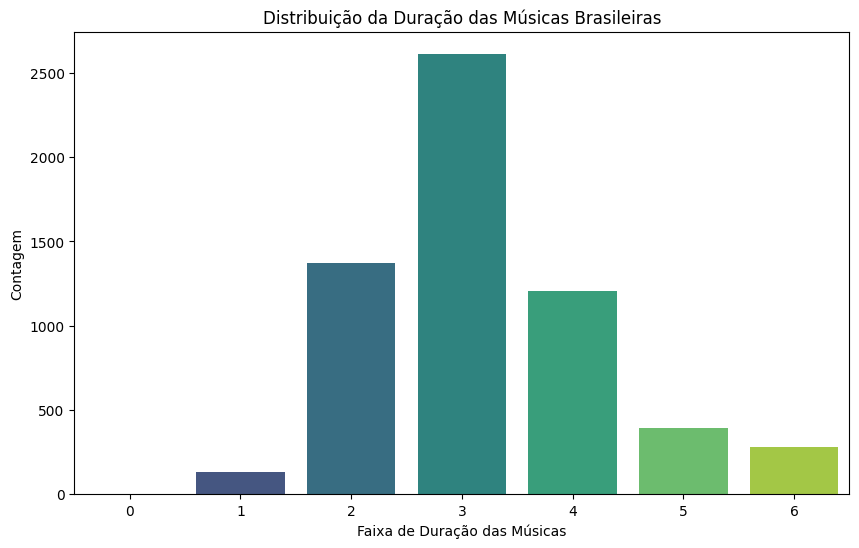

In [60]:
plt.figure(figsize=(10, 6))
sns.countplot(x='duration_bin', data=dados_br, palette='viridis')

plt.xlabel('Faixa de Duração das Músicas')
plt.ylabel('Contagem')
plt.title('Distribuição da Duração das Músicas Brasileiras')

plt.show()

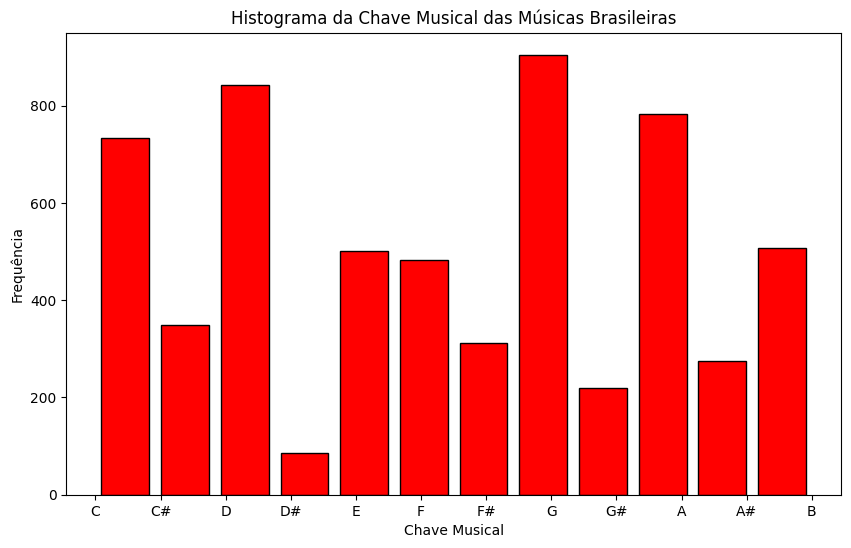

In [61]:
plt.figure(figsize=(10, 6))
plt.hist(dados_br['key'], bins=12, color='red', edgecolor='black', align='mid', rwidth=0.8)

plt.xlabel('Chave Musical')
plt.ylabel('Frequência')
plt.title('Histograma da Chave Musical das Músicas Brasileiras')

# Definir rótulos específicos para cada chave musical
plt.xticks(range(12), ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])

plt.show()

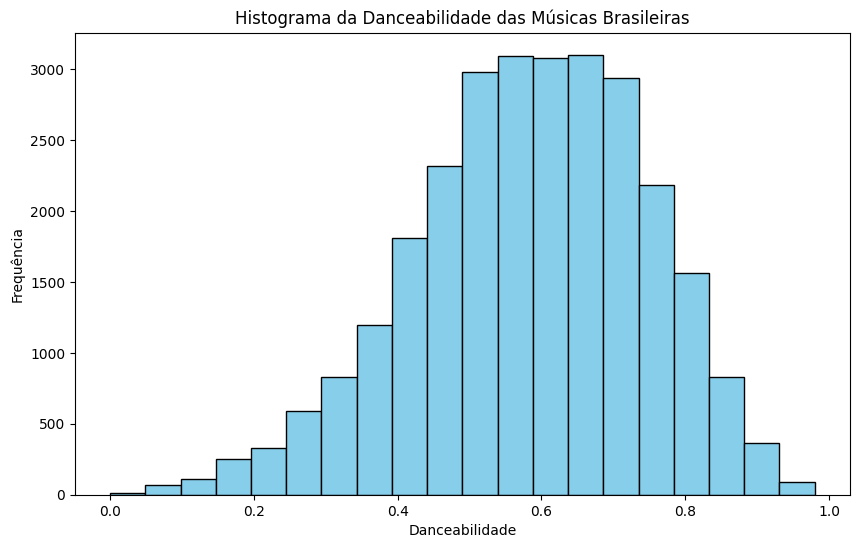

In [62]:
plt.figure(figsize=(10, 6))
plt.hist(musicas_populares['danceability'], bins=20, color='skyblue', edgecolor='black')


plt.xlabel('Danceabilidade')
plt.ylabel('Frequência')
plt.title('Histograma da Danceabilidade das Músicas Brasileiras')

plt.show()


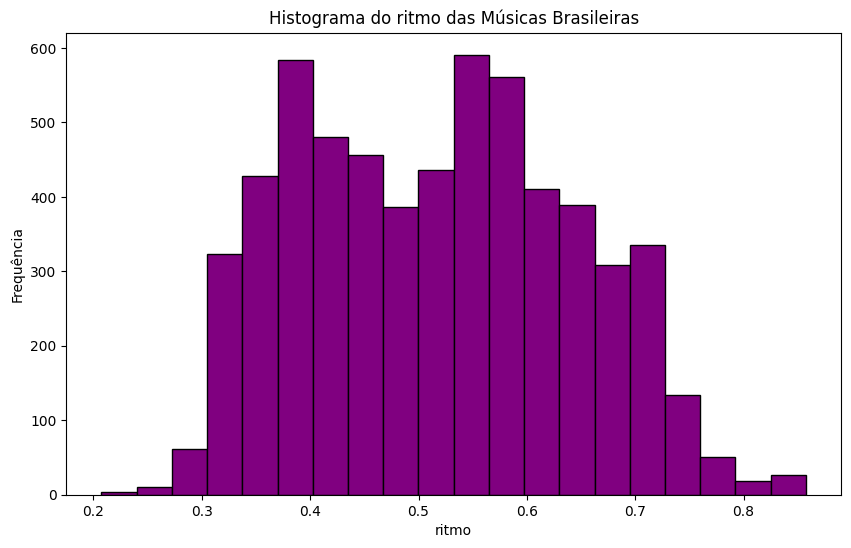

In [63]:
plt.figure(figsize=(10, 6))
plt.hist(dados_br['tempo'], bins=20, color='purple', edgecolor='black')

plt.xlabel('ritmo')
plt.ylabel('Frequência')
plt.title('Histograma do ritmo das Músicas Brasileiras')

plt.show()

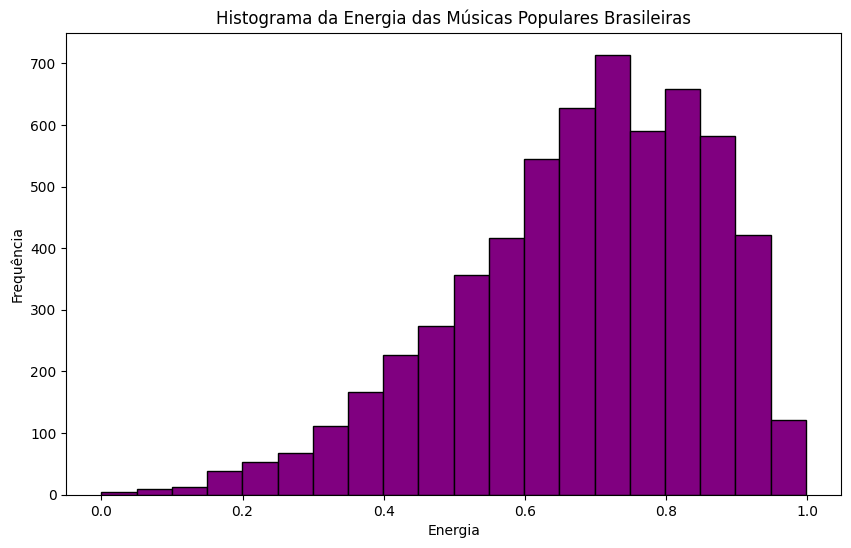

In [64]:
plt.figure(figsize=(10, 6))
plt.hist(dados_br['energy'], bins=20, color='purple', edgecolor='black')

plt.xlabel('Energia')
plt.ylabel('Frequência')
plt.title('Histograma da Energia das Músicas Populares Brasileiras')

plt.show()

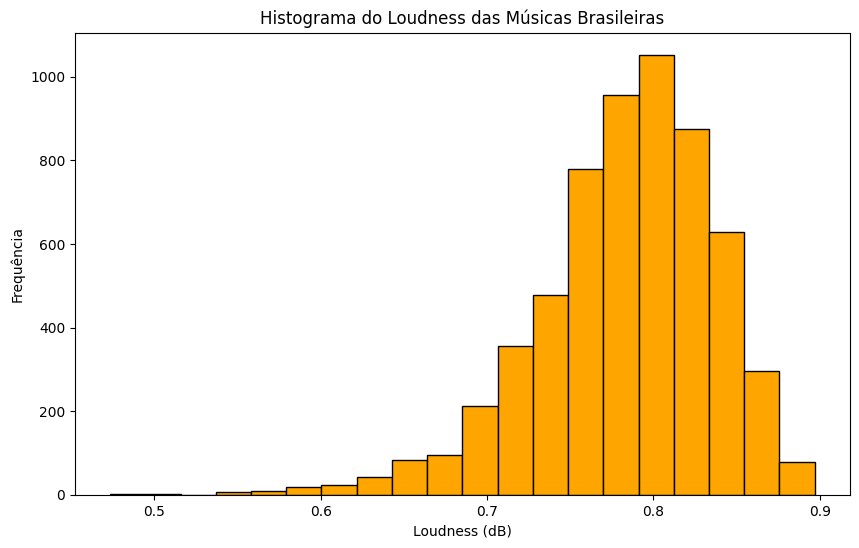

In [65]:
plt.figure(figsize=(10, 6))
plt.hist(dados_br['loudness'], bins=20, color='orange', edgecolor='black')

plt.xlabel('Loudness (dB)')
plt.ylabel('Frequência')
plt.title('Histograma do Loudness das Músicas Brasileiras')

plt.show()

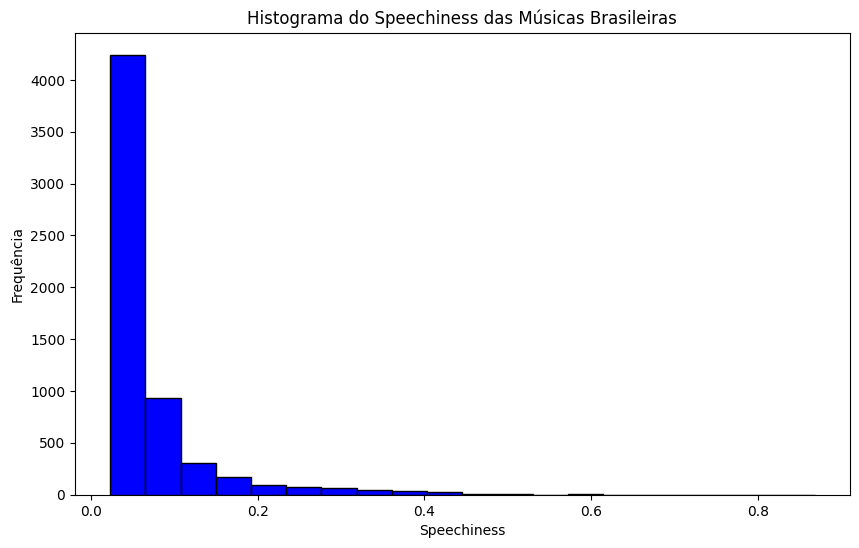

In [66]:
plt.figure(figsize=(10, 6))
plt.hist(dados_br['speechiness'], bins=20, color='blue', edgecolor='black')

plt.xlabel('Speechiness')
plt.ylabel('Frequência')
plt.title('Histograma do Speechiness das Músicas Brasileiras')

plt.show()

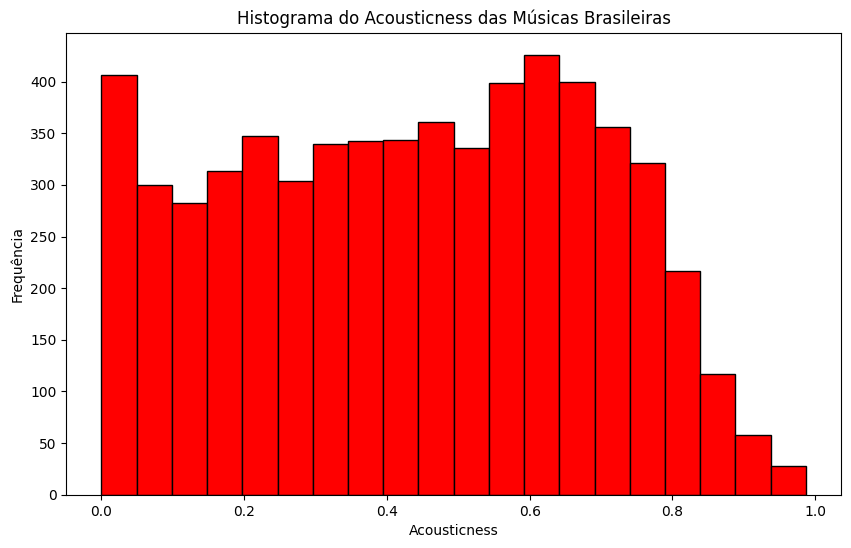

In [67]:
plt.figure(figsize=(10, 6))
plt.hist(dados_br['acousticness'], bins=20, color='red', edgecolor='black')

plt.xlabel('Acousticness')
plt.ylabel('Frequência')
plt.title('Histograma do Acousticness das Músicas Brasileiras')

plt.show()

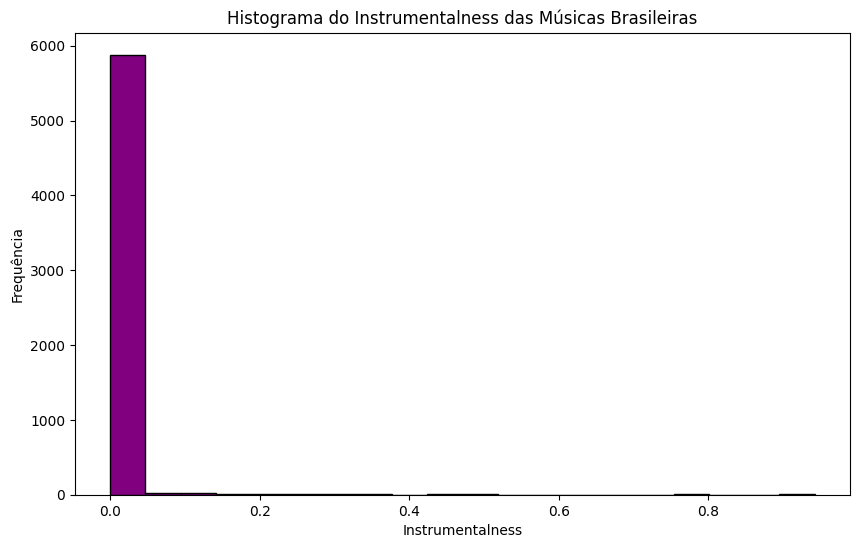

In [68]:
plt.figure(figsize=(10, 6))
plt.hist(dados_br['instrumentalness'], bins=20, color='purple', edgecolor='black')

plt.xlabel('Instrumentalness')
plt.ylabel('Frequência')
plt.title('Histograma do Instrumentalness das Músicas Brasileiras')

plt.show()

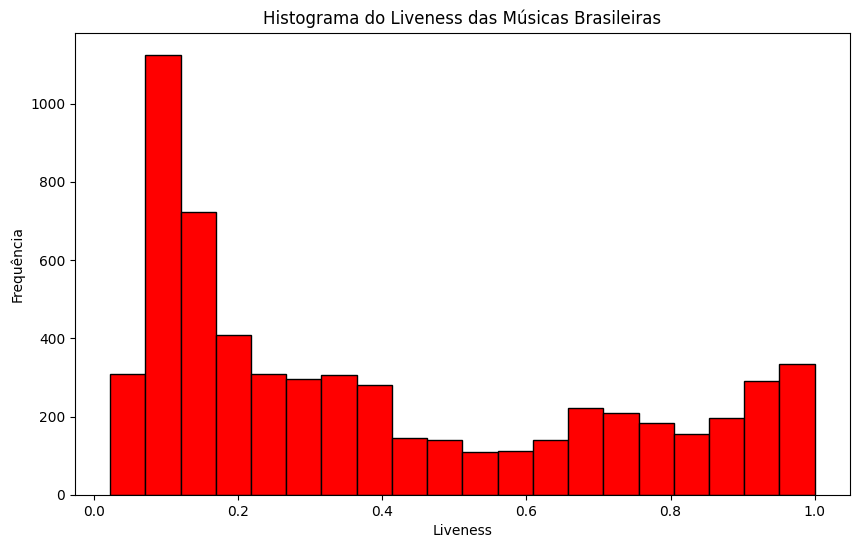

In [69]:
plt.figure(figsize=(10, 6))
plt.hist(dados_br['liveness'], bins=20, color='red', edgecolor='black')

plt.xlabel('Liveness')
plt.ylabel('Frequência')
plt.title('Histograma do Liveness das Músicas Brasileiras')

plt.show()

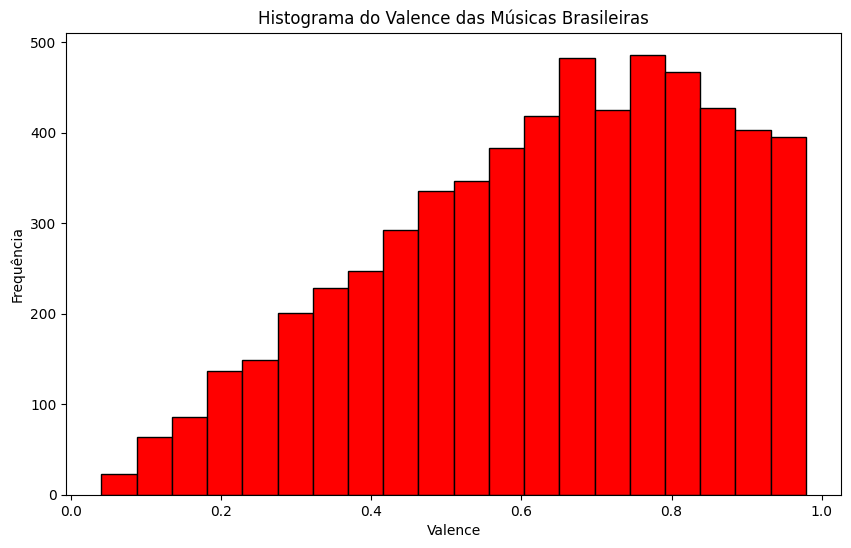

In [70]:
plt.figure(figsize=(10, 6))
plt.hist(dados_br['valence'], bins=20, color='red', edgecolor='black')

plt.xlabel('Valence')
plt.ylabel('Frequência')
plt.title('Histograma do Valence das Músicas Brasileiras')

plt.show()

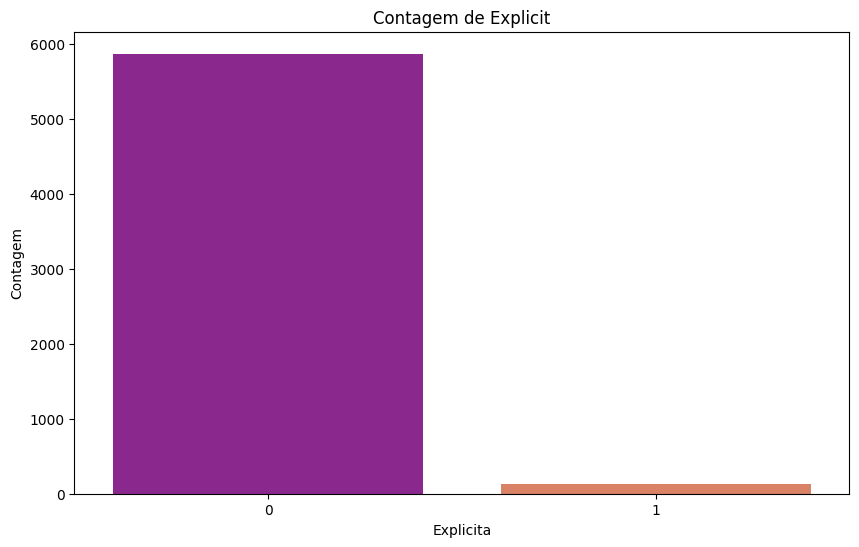

In [71]:
plt.figure(figsize=(10, 6))
sns.countplot(x='explicit', data=dados_br, palette='plasma')

plt.xlabel('Explicita')
plt.ylabel('Contagem')
plt.title('Contagem de Explicit')

plt.show()

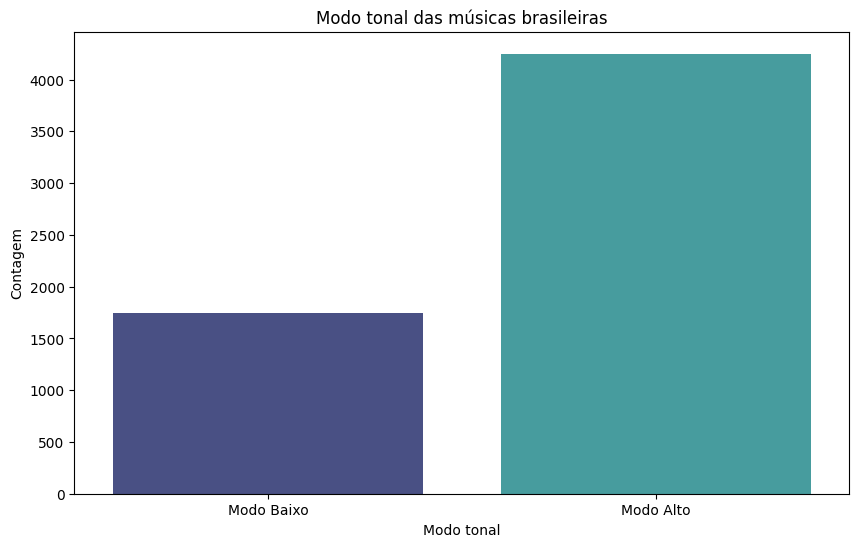

In [72]:
plt.figure(figsize=(10, 6))
g = sns.countplot(x='mode', data=dados_br, palette='mako')

plt.xlabel('Modo tonal')
plt.ylabel('Contagem')
plt.title('Modo tonal das músicas brasileiras')

g.set(xticklabels=["Modo Baixo", "Modo Alto"])

plt.show()

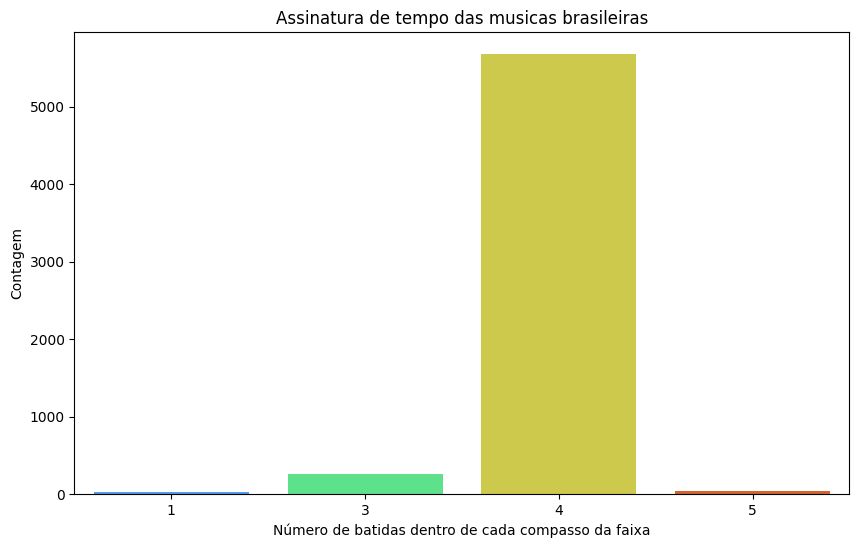

In [73]:
plt.figure(figsize=(10, 6))
sns.countplot(x='time_signature', data=dados_br, palette='turbo')

plt.xlabel('Número de batidas dentro de cada compasso da faixa')
plt.ylabel('Contagem')
plt.title('Assinatura de tempo das musicas brasileiras')

plt.show()

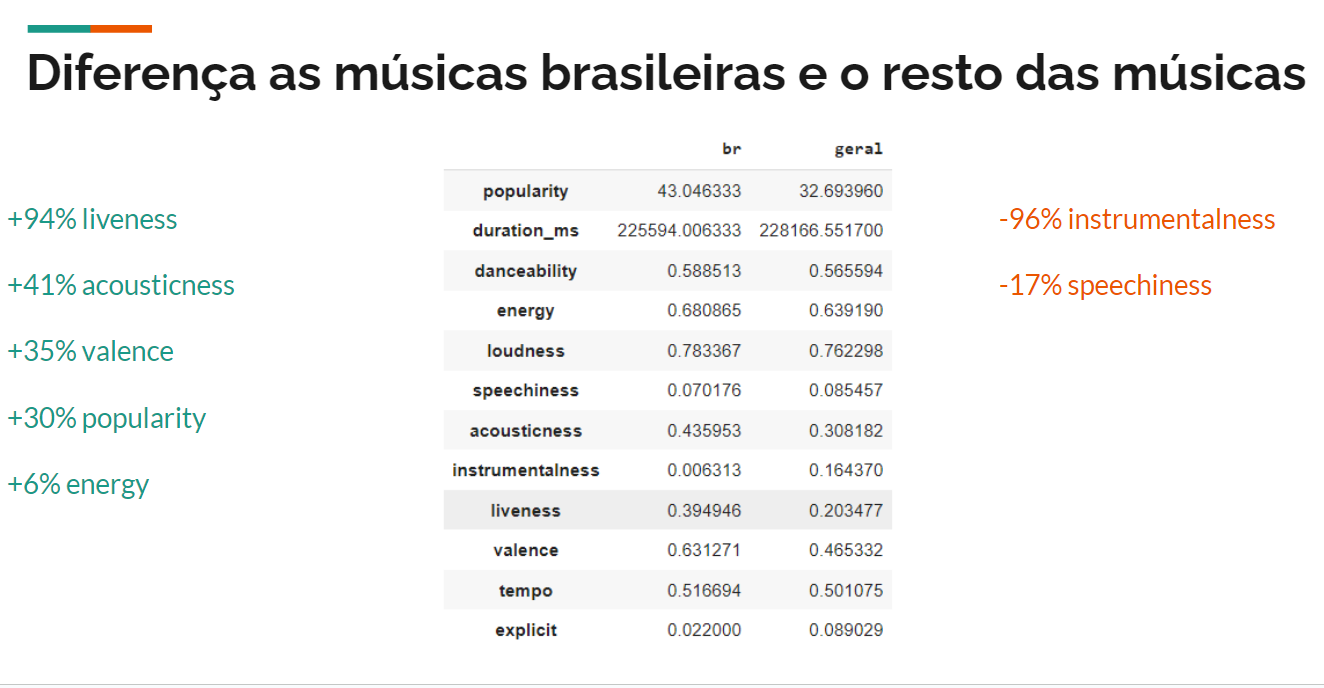

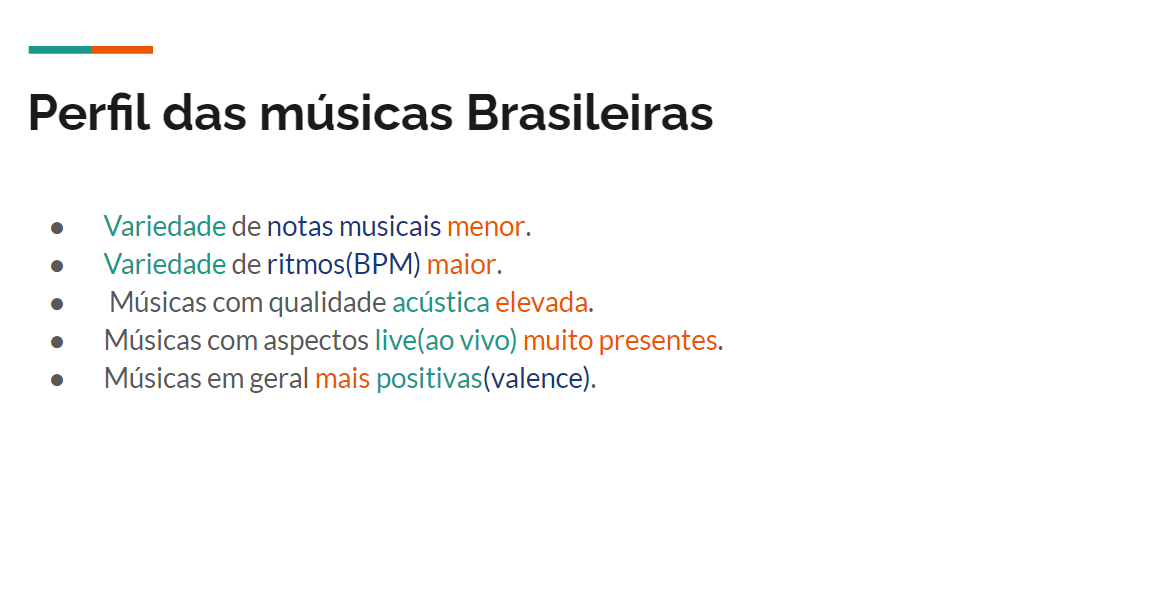

# Regressão Linear para prever popularity


In [74]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

dados_numericos = dados.apply(lambda x: pd.factorize(x)[0])

# Identificar outliers
Q1 = dados_numericos.quantile(0.25)
Q3 = dados_numericos.quantile(0.75)
IQR = Q3 - Q1
outliers = ((dados_numericos < (Q1 - 1.5 * IQR)) | (dados_numericos > (Q3 + 1.5 * IQR))).any(axis=1)

# Remover outliers do conjunto de dados
dados_limpos = dados[~outliers]

X = dados_limpos.drop(['popularity', 'track_id', 'duration_ms', 'artists', 'album_name', 'track_name'], axis=1)
y = dados_limpos['popularity']

# Aplicar o OneHotEncoder na variável categórica 'track_genre'
encoder = OneHotEncoder(sparse=False)
ct = ColumnTransformer([('encoder', encoder, ['track_genre'])], remainder='passthrough')
X_encoded = ct.fit_transform(X)

model = LinearRegression()
cv_scores = cross_val_score(model, X_encoded, y, cv=5, scoring='r2')

# Avaliar o modelo
print('Média do R^2 na validação cruzada:', np.mean(cv_scores))

Média do R^2 na validação cruzada: -1.3132337961483952e+21


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Erro quadrático médio:', mse)
print('Coeficiente de determinação (R^2):', r2)

Erro quadrático médio: 375.7830442102716
Coeficiente de determinação (R^2): 0.24427841769269987


## Conclusões

- Os resultados das previsões realizadas com o modelo de regressão linear não foram satisfatórios para prever a popularidade das músicas com base apenas em suas métricas. Esta falta de precisão pode ser atribuída à ausência de correlação significativa entre a variável alvo (popularidade) e as demais variáveis no conjunto de dados.

- Isso indica que as métricas disponíveis no Spotify não são suficientes para prever com precisão a popularidade de uma música. A música é um fenômeno complexo que envolve não apenas suas características técnicas, mas também fatores culturais, sociais e de marketing.

- A análise revela que o sucesso de uma música vai além de suas métricas individuais e está sujeito a uma variedade de influências externas. Por exemplo, observamos que o gênero mais popular no conjunto de dados foi "pop_film", sugerindo uma possível associação com trilhas sonoras de filmes e ressaltando a importância do marketing e de associações com outras formas de mídia no sucesso das músicas.

- Portanto, concluímos que a popularidade das músicas é determinada por uma interação complexa de fatores e não pode ser completamente explicada apenas por suas características técnicas. Esta análise destaca a necessidade de considerar uma ampla gama de variáveis ao tentar compreender e prever a popularidade das músicas.

# Agrupamento de músicas similares



In [76]:
!pip install hdbscan

In [77]:
from sklearn.metrics import silhouette_score
from hdbscan import HDBSCAN

hdbscan = HDBSCAN()
clusters_HDBSCAN = hdbscan.fit_predict(X_encoded)

silhouette_avg = silhouette_score(X_encoded, clusters_HDBSCAN)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.21031588371036009


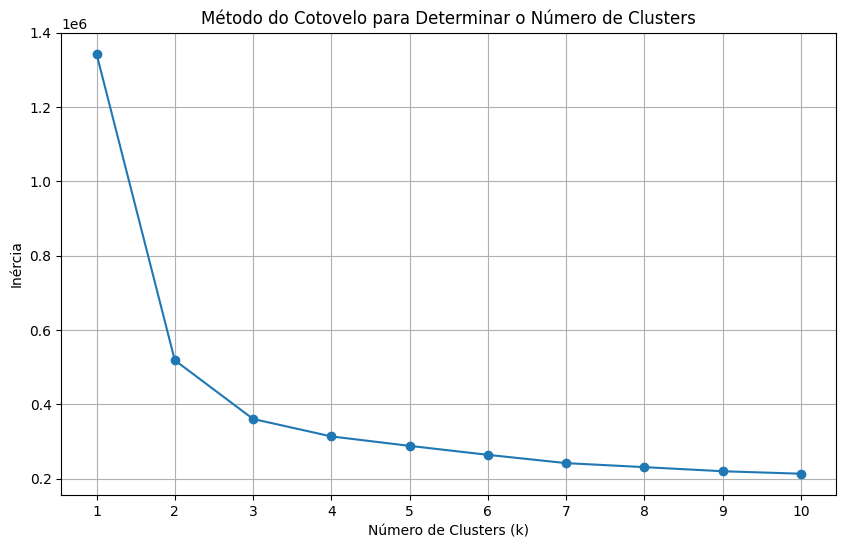

In [78]:
from sklearn.cluster import KMeans

# Lista para armazenar os valores de inércia
inertia = []

# Número de clusters a serem testados
k_values = range(1, 11)

# Calculando a inércia para diferentes valores de k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_encoded)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para Determinar o Número de Clusters')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [79]:
kmeans = KMeans(n_clusters=3, random_state=42, init = 'k-means++', n_init = 10)
clusters_kmeans = kmeans.fit_predict(X_encoded)

silhouette_avg = silhouette_score(X_encoded, clusters_kmeans)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.3718995908746283


In [80]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_DBSCAN = dbscan.fit_predict(X_encoded)

silhouette_avg = silhouette_score(X_encoded, clusters_DBSCAN)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.07178936379860937


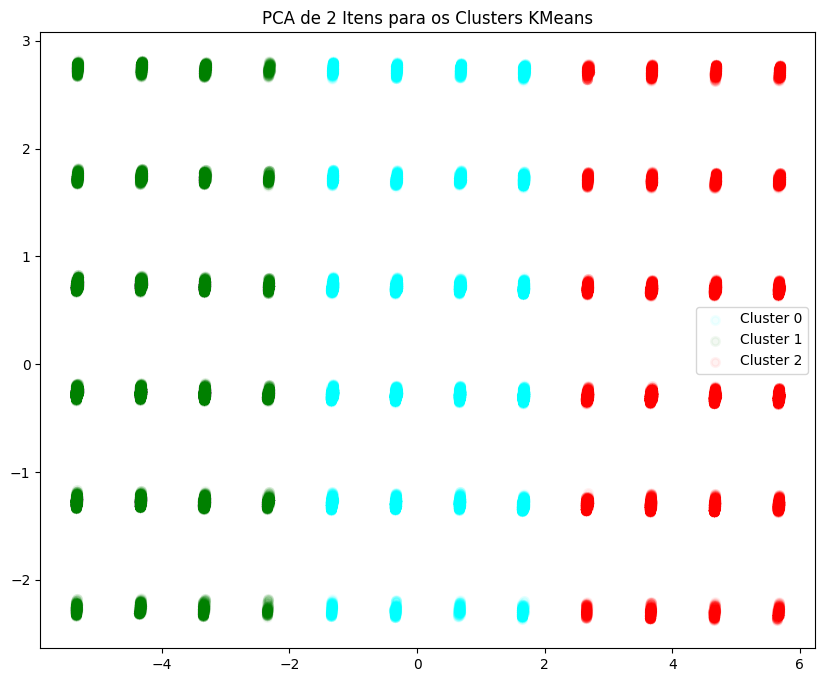

In [81]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduzir a dimensionalidade dos dados para 2 componentes principais
pca = PCA(n_components=2, random_state=400)
X_r = pca.fit_transform(X_encoded)

plt.figure(figsize=(10, 8))
colors = ['cyan', 'green', 'red']
lw = 2
for cluster, color in zip(range(3), colors):
    plt.scatter(X_r[clusters_kmeans == cluster, 0], X_r[clusters_kmeans == cluster, 1], color=color, alpha=0.05, lw=lw, label=f'Cluster {cluster}')

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA de 2 Itens para os Clusters KMeans')
plt.show()

##Conclusão sobre Agrupamento

- Os resultados mostram que o K-Means teve melhor desempenho, com Silhouette Score de 0.372, indicando alguma separação entre os clusters.

- No entanto, os dados não apresentaram uma diferenciação nítida entre os grupos. Isso sugere que os atributos considerados podem são muito parecidos para diversas músicas independete de suas peculiaridades.
